<a href="https://colab.research.google.com/github/ymkge/competiton/blob/main/SMBC_Group_GREEN_DATA_Challenge_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title pycaretはインストール後、colabの再起動が必要になる為、一番最初に実行する
!pip install pycaret[full] # 必要な時のみインストールする

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 62.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44

# SIGNATE APIでデータ取得


In [ ]:
# @title 事前準備
!pip install signate

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=159adae08fb39e5c7622b352cea76433b41d9a545e11051ac9f9c170e131c54c
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget



計画のステップ
1. データ収集と理解

データの収集:
- アメリカの大気観測施設の位置情報データ
- 有害物質（TRI）排出量データ
- GHG排出量データ（特に2014年のGHG_Direct_Emissions_14_in_metric_tons）
- 必要に応じて外部データ（気象データ、経済データ、地域特性など）

データの理解:
- 各データセットの内容、形式、欠損値の有無を確認する。
- データの前処理が必要な箇所を特定する（例：異常値の処理、スケーリング、エンコーディングなど）。

2. データ前処理

クリーニング:
- 欠損値の処理（削除、補完など）
- 異常値の検出と処理

特徴量エンジニアリング:
- 位置情報データから距離や地域特性を抽出
- 時間的要因（季節性、トレンドなど）を考慮した特徴量の作成
- TRIデータとGHGデータの関連性を分析し、新たな特徴量を生成

3. モデル選定と構築

モデル選定:
- 機械学習アルゴリズムの選定（例：線形回帰、決定木、ランダムフォレスト、XGBoost、ニューラルネットワークなど）
- 複数のモデルを試し、性能を比較する。


モデル構築:
- トレーニングデータとテストデータに分割
- 選定したモデルを用いてトレーニングを行う。

4. モデル評価とチューニング

評価指標の設定:
- RMSE（平均二乗誤差の平方根）、MAE（平均絶対誤差）などの指標を用いてモデルの性能を評価。

ハイパーパラメータチューニング:
- グリッドサーチやランダムサーチを用いて最適なハイパーパラメータを見つける。

5. 結果の解釈と報告

結果の解釈:
- モデルの予測結果を分析し、重要な特徴量を特定する。
- GHG排出量に影響を与える要因を明らかにする。

報告書の作成:
- 予測結果、使用したデータ、モデルの選定理由、評価結果をまとめた報告書を作成する。

6. 提出準備

提出形式の確認:
- コンペティションのルールに従い、提出形式を確認する（例：CSVファイル、特定のカラム名など）。

最終チェック:
- 提出前に全てのデータとモデルの最終確認を行い、必要な修正を加える。

まとめ
この計画に従って進めることで、GHG排出量の予測モデルを効果的に構築し、持続可能な社会の実現に向けた貢献が期待できます。各ステップでの詳細な分析と検証が成功の鍵となります。

In [ ]:
# @title driveへのアクセス
auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'signate.json'", fields="files(id)").execute()
signate_api_key = results.get('files', [])

filename = "/root/.signate/signate.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=signate_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [ ]:
# @title コンペの一覧確認
!signate list

  competitionId  title                                                                             closing     prize            submitters
---------------  --------------------------------------------------------------------------------  ----------  -------------  ------------
              1  【練習問題】銀行の顧客ターゲティング                                              -                                  7279
             24  【練習問題】お弁当の需要予測                                                      -                                  8898
             27  【練習問題】Jリーグの観客動員数予測                                               -                                  2215
            100  【練習問題】手書き文字認識                                                        -           Knowledge               382
            102  【練習問題】タイタニックの生存予測                                                -           Knowledge              3209
            103  【練習問題】音楽ラベリング                                                        -           Knowledg

In [ ]:
# @title コンペ用データ取得
!signate files --competition-id=1491

  fileId  name                   title                          size  updated_at
--------  ---------------------  --------------------------  -------  -------------------
    4151  train.csv              学習用データ                1153408  2024-10-29 16:39:12
    4152  test.csv               評価用データ                 574892  2024-10-29 16:39:42
    4153  sample_submission.csv  投稿用サンプルファイル        60192  2024-10-10 14:33:39
    4178  tutorial.ipynb         チュートリアルノートブック   353080  2024-11-01 15:04:52


In [ ]:
!signate download --competition-id=1491

sample_submission.csv

tutorial.ipynb

test.csv

train.csv


Download completed.


In [ ]:
!ls -l

total 2104
drwxr-xr-x 1 root root    4096 Dec  3 19:31 sample_data
-rw-r--r-- 1 root root   60192 Dec  5 11:03 sample_submission.csv
-rw-r--r-- 1 root root  574892 Dec  5 11:03 test.csv
-rw-r--r-- 1 root root 1153408 Dec  5 11:03 train.csv
-rw-r--r-- 1 root root  353080 Dec  5 11:03 tutorial.ipynb


In [ ]:
# @title データフレームにデータを格納
import pandas as pd

df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df_sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4655 entries, 0 to 4654
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              4655 non-null   int64  
 1   FacilityName                            4655 non-null   object 
 2   Latitude                                4553 non-null   float64
 3   Longitude                               4553 non-null   float64
 4   LocationAddress                         4476 non-null   object 
 5   City                                    4655 non-null   object 
 6   State                                   4655 non-null   object 
 7   ZIP                                     4655 non-null   object 
 8   County                                  4585 non-null   object 
 9   FIPScode                                4582 non-null   float64
 10  PrimaryNAICS                            4655 non-null   int6

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              2508 non-null   int64  
 1   FacilityName                            2508 non-null   object 
 2   Latitude                                2452 non-null   float64
 3   Longitude                               2452 non-null   float64
 4   LocationAddress                         2395 non-null   object 
 5   City                                    2508 non-null   object 
 6   State                                   2508 non-null   object 
 7   ZIP                                     2508 non-null   object 
 8   County                                  2463 non-null   object 
 9   FIPScode                                2463 non-null   float64
 10  PrimaryNAICS                            2508 non-null   int6

In [ ]:
df_train.describe()

Unnamed: 0     Latitude    Longitude      FIPScode   PrimaryNAICS  \
count  4655.000000  4553.000000  4553.000000   4582.000000    4655.000000   
mean   2327.000000    37.502474   -93.132567  29594.314055  354701.002578   
std    1343.927081     5.739955    15.680084  16565.382504  145549.947021   
min       0.000000    13.394900  -166.553496   1001.000000  111419.000000   
25%    1163.500000    33.471611   -98.498664  17105.500000  221112.000000   
50%    2327.000000    37.873810   -90.446667  29034.000000  325180.000000   
75%    3490.500000    41.152783   -82.604399  45050.000000  486210.000000   
max    4654.000000    70.490861   144.807727  78010.000000  928110.000000   

       SecondPrimaryNAICS  TRI_Air_Emissions_10_in_lbs  \
count          379.000000                 1.635000e+03   
mean        320797.759894                 6.179064e+04   
std          36638.391132                 1.344983e+05   
min         212113.000000                 2.279515e+03   
25%         322121.000000                 2.525215e+04   
50%         325199.000000                 3.204187e+04   
75%         331111.000000                 4.019123e+04   
max         562212.000000                 1.251231e+06   

       TRI_Air_Emissions_11_in_lbs  TRI_Air_Emissions_12_in_lbs  \
count                  1635.000000                  1635.000000   
mean                  43853.462331                 53770.293062   
std                   55988.952050                 93977.128341   
min                      34.450512                  2076.649083   
25%                   25319.052605                 22764.672344   
50%                   31765.719617                 29667.091832   
75%                   38329.096290                 36984.431956   
max                  478366.459152                743548.788013   

       TRI_Air_Emissions_13_in_lbs  GHG_Direct_Emissions_10_in_metric_tons  \
count                  1635.000000                            3.953000e+03   
mean                  56007.086034                            2.485158e+05   
std                  109863.242856                            5.225110e+05   
min                    4656.522747                            1.089413e+02   
25%                   22905.881327                            5.123975e+04   
50%                   29305.093678                            7.440347e+04   
75%                   36755.017845                            1.676409e+05   
max                  989230.802586                            3.900222e+06   

       GHG_Direct_Emissions_11_in_metric_tons  \
count                            4.284000e+03   
mean                             1.612068e+05   
std                              2.641831e+05   
min                              8.167190e-01   
25%                              3.733935e+04   
50%                              6.119749e+04   
75%                              1.418608e+05   
max                              2.698567e+06   

       GHG_Direct_Emissions_12_in_metric_tons  \
count                            4.395000e+03   
mean                             3.159905e+05   
std                              7.395843e+05   
min                              2.009966e+02   
25%                              4.822487e+04   
50%                              7.242684e+04   
75%                              2.279668e+05   
max                              6.837260e+06   

       GHG_Direct_Emissions_13_in_metric_tons  \
count                            4.507000e+03   
mean                             1.834006e+05   
std                              4.026237e+05   
min                              2.689283e+01   
25%                              3.547781e+04   
50%                              5.744658e+04   
75%                              1.195544e+05   
max                              4.330236e+06   

       GHG_Direct_Emissions_14_in_metric_tons  
count                            4.655000e+03  
mean                             2.525133e+05  
std           

In [ ]:
df_train.head()

Unnamed: 0                                   FacilityName   Latitude  \
0           0                               VISCOFAN USA INC  40.141389   
1           1  CORNWELL STATION - DOMINION TRANSMISSION, INC  38.475305   
2           2                  WEST UNION COMPRESSOR STATION  39.299820   
3           3                             DOUBLE "C" LIMITED  35.490363   
4           4                                LAKESHORE PLANT  41.532802   

    Longitude       LocationAddress         City State         ZIP     County  \
0  -87.581111    915 N MICHIGAN AVE     DANVILLE    IL       61832  VERMILION   
1  -81.278957  200 RIVER HAVEN ROAD    CLENDENIN    WV  25045-9304    KANAWHA   
2  -80.857170     3041 LONG RUN RD.    GREENWOOD    WV       26415    RITCHIE   
3 -119.042957   10245 OILFIELD ROAD  BAKERSFIELD    CA       93308       KERN   
4  -81.636448    6800 S MARGINAL RD    CLEVELAND    OH   441031047   CUYAHOGA   

   FIPScode  ...                       IndustryType  \
0   17183.0  ...                              Other   
1   54039.0  ...  Petroleum and Natural Gas Systems   
2   54085.0  ...  Petroleum and Natural Gas Systems   
3    6029.0  ...                       Power Plants   
4   39035.0  ...                       Power Plants   

   TRI_Air_Emissions_10_in_lbs TRI_Air_Emissions_11_in_lbs  \
0                 31566.709644                26644.986107   
1                          NaN                         NaN   
2                          NaN                         NaN   
3                          NaN                         NaN   
4                 29553.796627                28337.832145   

   TRI_Air_Emissions_12_in_lbs  TRI_Air_Emissions_13_in_lbs  \
0                 23410.379903                 31809.857564   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                 30840.825454                 25153.901905   

   GHG_Direct_Emissions_10_in_metric_tons  \
0                            64816.958901   
1                            55507.543666   
2                                     NaN   
3                            54811.222708   
4                            81812.306362   

   GHG_Direct_Emissions_11_in_metric_tons  \
0                            36588.744606   
1                            72387.334115   
2                                     NaN   
3                            69339.923002   
4                            53823.561587   

   GHG_Direct_Emissions_12_in_metric_tons  \
0                            37907.936721   
1                            58225.196089   
2                                     NaN   
3                            63647.340038   
4                            77391.157768   

   GHG_Direct_Emissions_13_in_metric_tons  \
0                            45598.125851   
1                            76376.547318   
2                                     NaN   
3                            53799.011225   
4                            17662.966241   

   GHG_Direct_Emissions_14_in_metric_tons  
0                            52973.139946  
1                            55910.066617  
2                            55679.543214  
3                            61411.902782  
4                            43100.469774  

[5 rows x 22 columns]

In [ ]:
df_test.head()

Unnamed: 0                                 FacilityName  Latitude  \
0        4655                           ROGER AOTSCHEGAROW  38.03304   
1        4656                  EPNG STATION 6543 LORDSBURG  32.31603   
2        4657  OWENS-BROCKWAY GLASS CONTAINER INC PLANT 19  41.25150   
3        4658                  WALDORF CORP (DBA ROCKTENN)  44.95966   
4        4659               SOLAR TURBINES INC KEARNY MESA  32.81872   

   Longitude             LocationAddress        City State        ZIP  \
0  -97.97317  1910 SOUTH BROADACRES ROAD  HUTCHINSON    KS      67501   
1 -108.60680                         NaN   LORDSBURG    NM      88045   
2  -78.74244              3831 ROUTE 219   BROCKPORT    PA      15823   
3  -93.19341             2250 WABASH AVE  SAINT PAUL    MN  551141895   
4 -117.12580       4200 RUFFIN RD MZ T-2   SAN DIEGO    CA      92123   

      County  FIPScode  ...  SecondPrimaryNAICS  \
0       RENO   20155.0  ...                 NaN   
1    HIDALGO   35023.0  ...                 NaN   
2  JEFFERSON   42065.0  ...                 NaN   
3     RAMSEY   27123.0  ...                 NaN   
4  SAN DIEGO    6073.0  ...                 NaN   

                                        IndustryType  \
0  Natural Gas and Natural Gas Liquids Suppliers,...   
1                  Petroleum and Natural Gas Systems   
2                                           Minerals   
3                                     Pulp and Paper   
4                                              Other   

  TRI_Air_Emissions_10_in_lbs  TRI_Air_Emissions_11_in_lbs  \
0                         NaN                          NaN   
1                         NaN                          NaN   
2                28275.061385                 32075.140635   
3                37330.205714                 42503.897432   
4                45310.722699                 39897.800897   

   TRI_Air_Emissions_12_in_lbs  TRI_Air_Emissions_13_in_lbs  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                 26445.792090                 23385.161510   
3                 43906.102080                 42958.306538   
4                 40203.428231                 39437.099224   

   GHG_Direct_Emissions_10_in_metric_tons  \
0                            88951.390376   
1                                     NaN   
2                            84908.372871   
3                            49004.603631   
4                            84959.769922   

   GHG_Direct_Emissions_11_in_metric_tons  \
0                            65803.021457   
1                                     NaN   
2                             6212.899604   
3                               52.038452   
4                            15351.359676   

   GHG_Direct_Emissions_12_in_metric_tons  \
0                            28993.291470   
1                           311926.001251   
2                            34732.906397   
3                            14262.365973   
4                            40006.544010   

   GHG_Direct_Emissions_13_in_metric_tons  
0                            32965.487915  
1                           268668.069110  
2                            39045.247387  
3                            20204.924986  
4                            63935.249120  

[5 rows x 21 columns]

In [ ]:
df_test.describe()

Unnamed: 0     Latitude    Longitude      FIPScode   PrimaryNAICS  \
count  2508.000000  2452.000000  2452.000000   2463.000000    2508.000000   
mean   5908.500000    37.570662   -92.363851  30404.922452  354306.630383   
std     724.141561     5.758665    15.263442  16241.454602  147092.064447   
min    4655.000000    13.463579  -158.125764   1001.000000  211111.000000   
25%    5281.750000    33.139870   -97.758778  17200.000000  221112.000000   
50%    5908.500000    38.047855   -90.131700  31067.000000  325155.000000   
75%    6535.250000    41.346859   -81.908218  47032.000000  486210.000000   
max    7162.000000    71.292071   144.678216  78030.000000  928110.000000   

       SecondPrimaryNAICS  TRI_Air_Emissions_10_in_lbs  \
count          184.000000                 8.740000e+02   
mean        318199.500000                 6.487513e+04   
std          48626.377425                 1.532609e+05   
min         115114.000000                 4.405829e+03   
25%         322130.000000                 2.465727e+04   
50%         325199.000000                 3.137226e+04   
75%         331111.000000                 3.898384e+04   
max         562910.000000                 1.374503e+06   

       TRI_Air_Emissions_11_in_lbs  TRI_Air_Emissions_12_in_lbs  \
count                   874.000000                   874.000000   
mean                  40970.199510                 49969.490551   
std                   50742.809398                 96607.925446   
min                    5343.548842                  3144.557141   
25%                   25406.683554                 23070.544500   
50%                   30861.833946                 29153.614011   
75%                   37976.075558                 35656.637976   
max                  481505.852810                898432.732339   

       TRI_Air_Emissions_13_in_lbs  GHG_Direct_Emissions_10_in_metric_tons  \
count                 8.740000e+02                            2.130000e+03   
mean                  5.099979e+04                            2.567106e+05   
std                   1.092213e+05                            5.239007e+05   
min                   1.221438e+03                            1.342263e+02   
25%                   2.206082e+04                            5.025370e+04   
50%                   2.811996e+04                            7.313435e+04   
75%                   3.498953e+04                            1.850996e+05   
max                   1.010902e+06                            3.927869e+06   

       GHG_Direct_Emissions_11_in_metric_tons  \
count                            2.297000e+03   
mean                             1.601432e+05   
std                              2.753633e+05   
min                              5.203845e+01   
25%                              3.543934e+04   
50%                              5.862897e+04   
75%                              1.138890e+05   
max                              2.120411e+06   

       GHG_Direct_Emissions_12_in_metric_tons  \
count                            2.371000e+03   
mean                             3.124102e+05   
std                              7.448045e+05   
min                              3.003952e+03   
25%                              4.570376e+04   
50%                              6.998558e+04   
75%                              2.150169e+05   
max                              6.112087e+06   

       GHG_Direct_Emissions_13_in_metric_tons  
count                            2.435000e+03  
mean                             1.892745e+05  
std                              4.284521e+05  
min                              2.226384e+02  
25%                              3.507816e+04  
50%                              5.659606e+04  
75%                              1.113874e+05  
max                              4.292472e+06

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4655 entries, 0 to 4654
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              4655 non-null   int64  
 1   FacilityName                            4655 non-null   object 
 2   Latitude                                4553 non-null   float64
 3   Longitude                               4553 non-null   float64
 4   LocationAddress                         4476 non-null   object 
 5   City                                    4655 non-null   object 
 6   State                                   4655 non-null   object 
 7   ZIP                                     4655 non-null   object 
 8   County                                  4585 non-null   object 
 9   FIPScode                                4582 non-null   float64
 10  PrimaryNAICS                            4655 non-null   int6

# データ内容把握＆ベースコードの確認

In [ ]:
df_train["Unnamed: 0"].value_counts()

Unnamed: 0
0       1
3127    1
3107    1
3106    1
3105    1
       ..
1551    1
1550    1
1549    1
1548    1
4654    1
Name: count, Length: 4655, dtype: int64

In [ ]:
import pandas as pd

result = df_train["SecondPrimaryNAICS"].value_counts()
percentage = df_train["SecondPrimaryNAICS"].value_counts(normalize=True) * 100

summary = pd.DataFrame({
    "count": result,
    "percentage": percentage
})

print(summary)

                    count  percentage
SecondPrimaryNAICS                   
331111.0               74   19.525066
311222.0               30    7.915567
325188.0               19    5.013193
322121.0               14    3.693931
221112.0               14    3.693931
...                   ...         ...
334413.0                1    0.263852
311615.0                1    0.263852
311422.0                1    0.263852
334119.0                1    0.263852
332111.0                1    0.263852

[104 rows x 2 columns]


In [ ]:
import pandas as pd

result = df_train["SecondPrimaryNAICS"].value_counts(dropna=False)
percentage = df_train["SecondPrimaryNAICS"].value_counts(normalize=True, dropna=False) * 100

summary = pd.DataFrame({
    "count": result,
    "percentage": percentage
})

print(summary)

                    count  percentage
SecondPrimaryNAICS                   
NaN                  4276   91.858217
331111.0               74    1.589689
311222.0               30    0.644468
325188.0               19    0.408163
322121.0               14    0.300752
...                   ...         ...
334413.0                1    0.021482
311615.0                1    0.021482
311422.0                1    0.021482
334119.0                1    0.021482
332111.0                1    0.021482

[105 rows x 2 columns]


In [ ]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, nan to 332111.0
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   count       105 non-null    int64  
 1   percentage  105 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.5 KB


In [ ]:
result.head()

SecondPrimaryNAICS
NaN         4276
331111.0      74
311222.0      30
325188.0      19
322121.0      14
Name: count, dtype: int64

In [ ]:
summary["count"]

SecondPrimaryNAICS
NaN         4276
331111.0      74
311222.0      30
325188.0      19
322121.0      14
            ... 
334413.0       1
311615.0       1
311422.0       1
334119.0       1
332111.0       1
Name: count, Length: 105, dtype: int64

In [ ]:
df_train["GHG_Direct_Emissions_11_in_metric_tons"].value_counts()

GHG_Direct_Emissions_11_in_metric_tons
40812.259684     2
36588.744606     1
79342.467827     1
67962.036416     1
335740.669306    1
                ..
64679.120080     1
16122.210228     1
89580.454396     1
737651.601659    1
27397.929966     1
Name: count, Length: 4283, dtype: int64

In [ ]:
# 基本的なライブラリは、Colabではデフォルトで利用可能

import pandas as pd               # データを表のように扱うライブラリ
import numpy as np                # 数値計算を速くするライブラリ
import seaborn as sns             # きれいなグラフを簡単に作るライブラリ
import matplotlib.pyplot as plt   # グラフを作る基本的なライブラリ
%matplotlib inline

from sklearn.model_selection import train_test_split  # データを訓練用と検証用に分ける
from sklearn.metrics import mean_squared_log_error # 評価の計算を行うライブラリ
import lightgbm as lgb # 予測モデルに関するライブラリ

import warnings
warnings.simplefilter('ignore')  # 不要な警告を表示しない

緯度（Latitude）経度（Longitude）の情報から地図上にマッピングしてみましょう。<br>
それだけでなく、目的変数である2014年のGHG排出量の大小で色分けもしてみます。<br>
難しいかつ、使用頻度が高くないコードですので、覚えずに生成AIを活用してください！


In [ ]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from IPython.display import display

# 必要なデータを抽出し、新しいデータフレームを作成
data = df_train[['Latitude', 'Longitude', 'GHG_Direct_Emissions_14_in_metric_tons']].copy()

# 緯度、経度、排出量のいずれかが欠損している行を削除
data.dropna(subset=['Latitude', 'Longitude', 'GHG_Direct_Emissions_14_in_metric_tons'], inplace=True)

# 各列のデータ型を float に変換
for col in ['Latitude', 'Longitude', 'GHG_Direct_Emissions_14_in_metric_tons']:
    data[col] = data[col].astype(float)

# 地図の中心をデータの緯度と経度の平均位置に設定
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=5)

# 排出量の最大値と最小値を取得
max_emission = data['GHG_Direct_Emissions_14_in_metric_tons'].max()
min_emission = data['GHG_Direct_Emissions_14_in_metric_tons'].min()

# カラーマップを設定（排出量が少ない地点は黄色、多い地点は赤色で表示）
colormap = cm.get_cmap('YlOrRd')
normalize = colors.Normalize(vmin=min_emission, vmax=max_emission)

# 各地点に対して、排出量に応じた色の円マーカーを作成し地図に追加
for idx, row in data.iterrows():
    # 排出量に基づいて色を設定
    color = colors.rgb2hex(colormap(normalize(row['GHG_Direct_Emissions_14_in_metric_tons'])))

    # 円マーカーを作成
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],  # 緯度・経度
        radius=5,  # 円のサイズ
        popup=f"Emissions: {row['GHG_Direct_Emissions_14_in_metric_tons']}",  # ポップアップに排出量を表示
        color=color,  # 枠の色
        fill=True,  # 円を塗りつぶす
        fill_color=color  # 塗りつぶしの色
    ).add_to(m)

# 地図を表示（Jupyter Notebook 上で表示可能）
display(m)


In [ ]:
df_train['IndustryType'].value_counts()

IndustryType
Petroleum and Natural Gas Systems                                                               960
Power Plants                                                                                    943
Waste                                                                                           859
Other                                                                                           723
Minerals                                                                                        246
Chemicals                                                                                       209
Metals                                                                                          199
Other,Waste                                                                                      86
Pulp and Paper                                                                                   81
Natural Gas and Natural Gas Liquids Suppliers,Petroleum and Natural Gas Systems                  65
Pulp and Paper,Waste                                                                             57
Petroleum Product Suppliers,Refineries                                                           37
Chemicals,Petroleum Product Suppliers,Refineries                                                 28
Chemicals,Suppliers of CO2                                                                       24
Other,Suppliers of CO2                                                                           19
Metals,Waste                                                                                     11
Refineries                                                                                       10
Other,Suppliers of CO2,Waste                                                                     10
Chemicals,Industrial Gas Suppliers                                                                7
Injection of CO2,Petroleum and Natural Gas Systems,Suppliers of CO2                               6
Pulp and Paper,Suppliers of CO2,Waste                                                             6
Minerals,Waste                                                                                    6
Petroleum and Natural Gas Systems,Suppliers of CO2                                                5
Chemicals,Refineries,Suppliers of CO2                                                             5
Chemicals,Waste                                                                                   5
Other,Power Plants                                                                                5
Chemicals,Petroleum Product Suppliers,Refineries,Suppliers of CO2                                 5
Injection of CO2,Petroleum and Natural Gas Systems                                                3
Power Plants,Waste                                                                                3
Chemicals,Refineries                                                                              3
Petroleum Product Suppliers,Petroleum and Natural Gas Systems                                     3
Natural Gas and Natural Gas Liquids Suppliers,Power Plants                                        3
Import and Export of Equipment Containing Fluorintaed GHGs,Other                                  2
Chemicals,Petroleum Product Suppliers                                                             1
Import and Export of Equipment Containing Fluorintaed GHGs,Industrial Gas Suppliers,Other         1
Petroleum Product Suppliers,Power Plants,Refineries                                               1
Injection of CO2,Power Plants,Suppliers of CO2                                                    1
Chemicals,Petroleum Product Suppliers,Refineries,Waste                                            1
Power Plants,Chemicals,Coal-based Liquid Fuel Supply,Suppliers of CO2                             1
Natural Gas and Natural Gas Liquids Suppliers,Other,Petroleum and Natural Gas Systems  

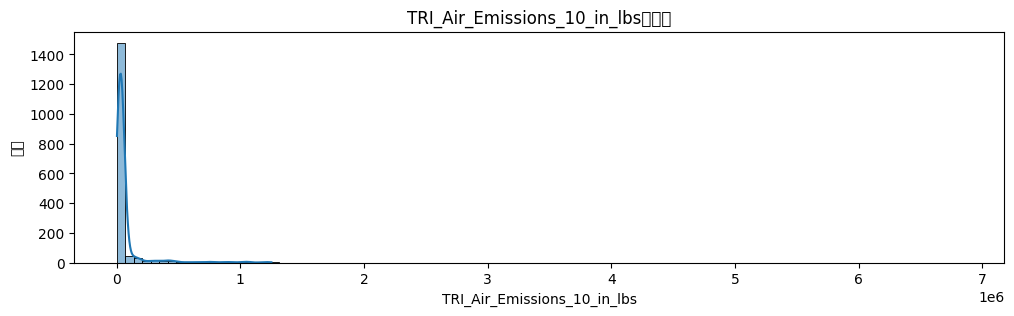

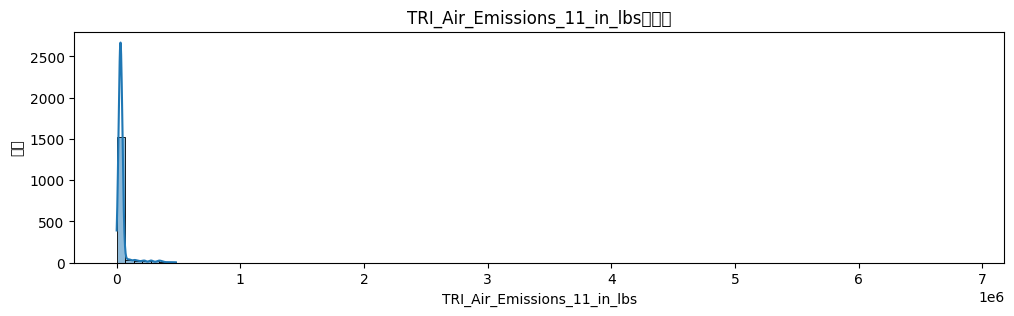

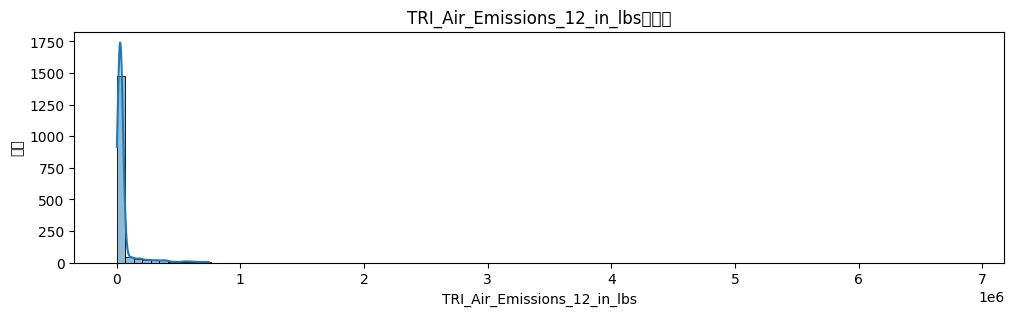

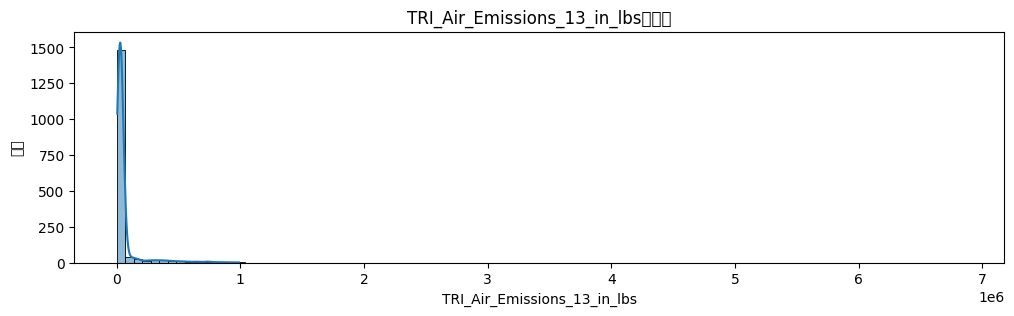

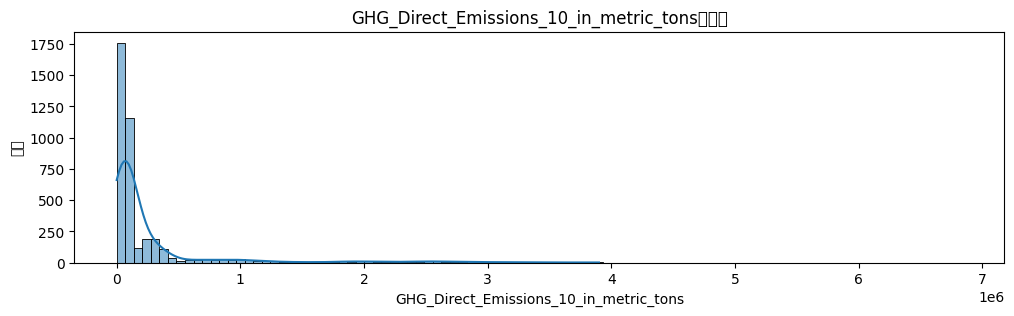

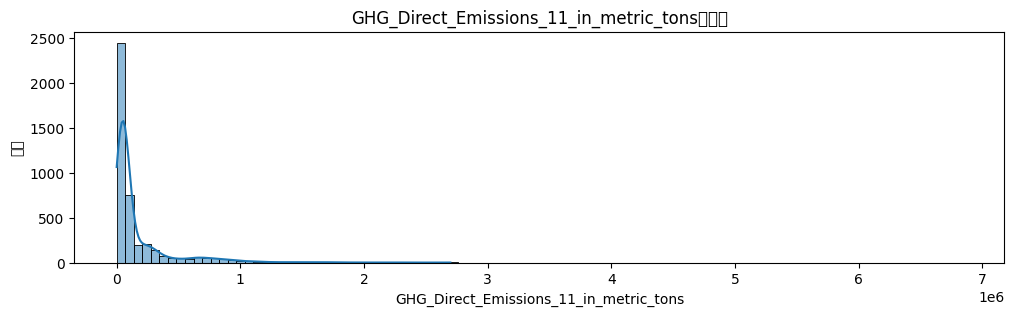

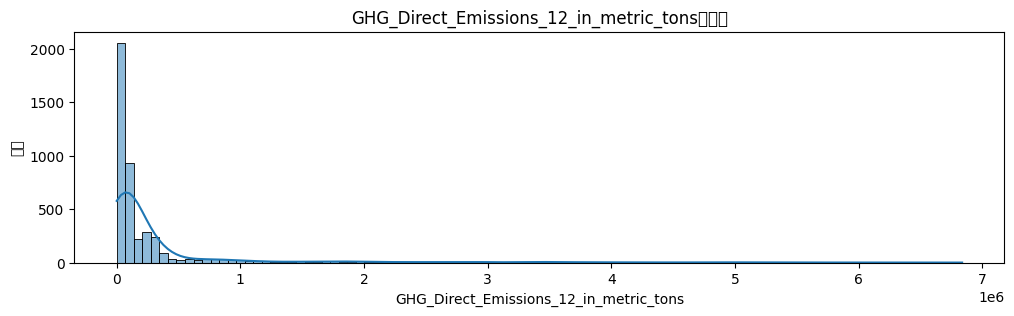

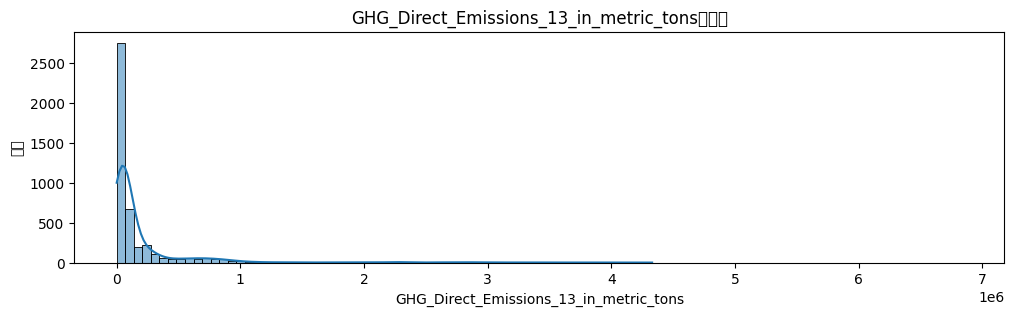

In [ ]:
numerical_features = [
    'TRI_Air_Emissions_10_in_lbs',
    'TRI_Air_Emissions_11_in_lbs',
    'TRI_Air_Emissions_12_in_lbs',
    'TRI_Air_Emissions_13_in_lbs',
    'GHG_Direct_Emissions_10_in_metric_tons',
    'GHG_Direct_Emissions_11_in_metric_tons',
    'GHG_Direct_Emissions_12_in_metric_tons',
    'GHG_Direct_Emissions_13_in_metric_tons',
    ]

num_bins = 100
min_value = df_train[numerical_features].min().min()
max_value = df_train[numerical_features].max().max()
bins = np.linspace(min_value, max_value, num_bins)

for col in numerical_features:
    plt.figure(figsize=(12, 3))
    sns.histplot(df_train[col], bins=bins, kde=True)
    plt.title(f'{col}の分布')
    plt.xlabel(col)
    plt.ylabel('頻度')
    plt.show()
    print()

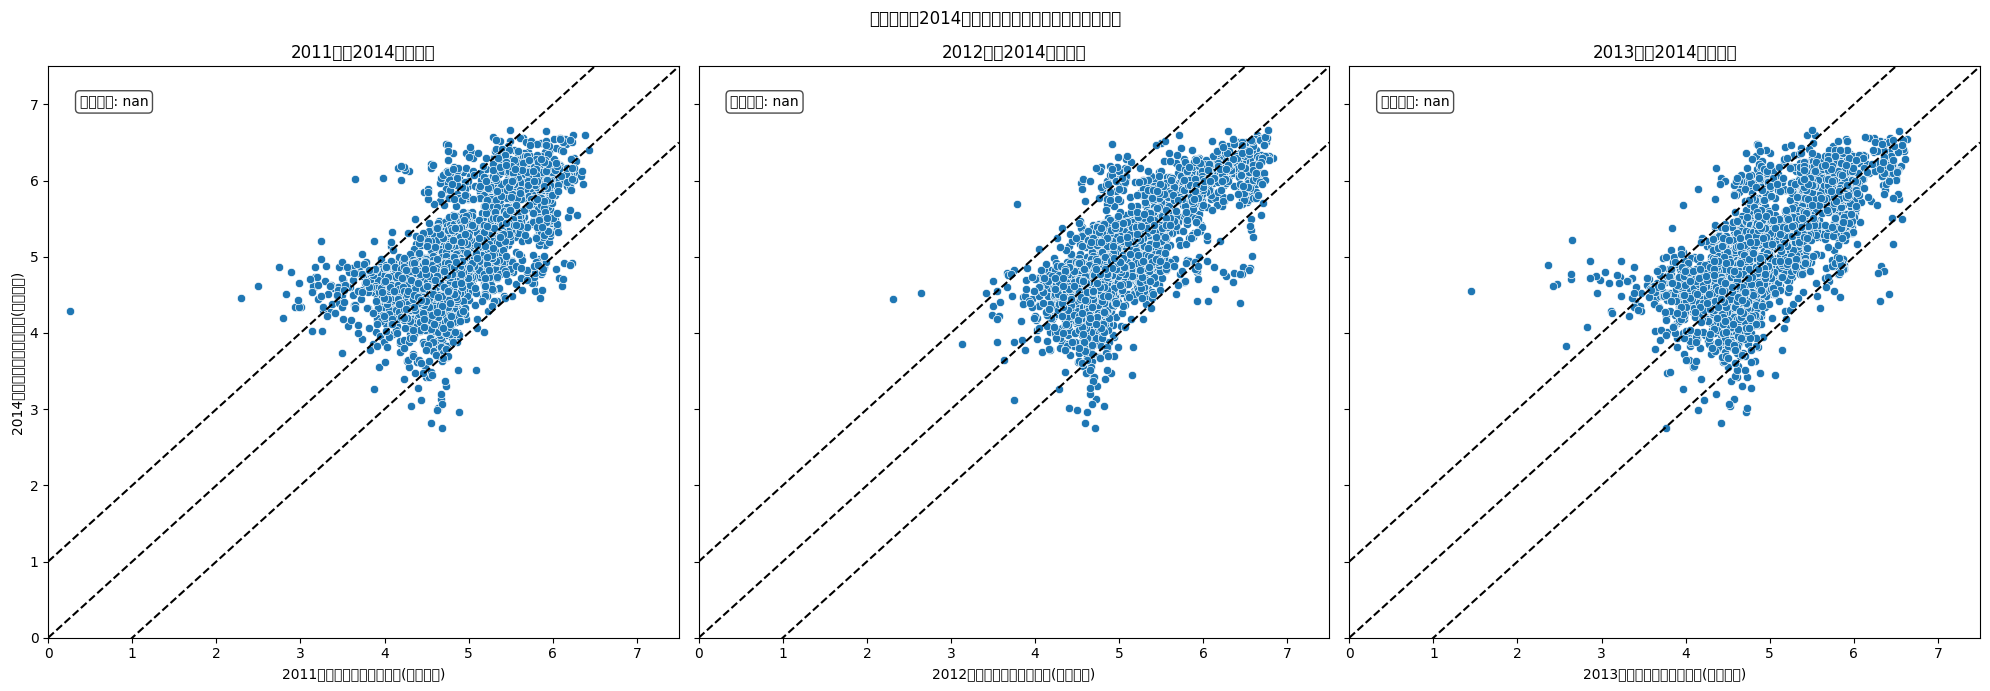

In [ ]:
# ---- 前年の温室効果ガス排出量との相関を比較します ----
# 温室効果ガス排出量は常用対数を取ります。
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7), sharex="all", sharey="all")

# 相関係数を計算する関数
def calculate_correlation(x, y):
    return np.corrcoef(x, y)[0, 1]

# プロットと相関係数の表示
years = ['11', '12', '13']
for i, year in enumerate(years):
    x = np.log10(df_train[f"GHG_Direct_Emissions_{year}_in_metric_tons"] + 1)
    y = np.log10(df_train["GHG_Direct_Emissions_14_in_metric_tons"] + 1)

    # 散布図のプロット
    sns.scatterplot(x=x, y=y, ax=axes[i])

    # 相関係数の計算と表示
    corr = calculate_correlation(x, y)
    axes[i].text(0.05, 0.95, f'相関係数: {corr:.3f}', transform=axes[i].transAxes,
                 verticalalignment='top', fontsize=10,
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

    # 軸ラベルの設定
    axes[i].set_title(f"20{year}年と2014年の相関")
    axes[i].set_xlabel(f"20{year}年温室効果ガス排出量(常用対数)")
    axes[i].set_ylabel("2014年温室効果ガス排出量(常用対数)")
    axes[i].set_xticks(range(0, 8))
    axes[i].set_yticks(range(0, 8))
    axes[i].set_xlim(0, 7.5)
    axes[i].set_ylim(0, 7.5)

    # y = x の補助線
    axes[i].plot([0, 7.5], [0, 7.5], color="black", linestyle="dashed")

    # y = x + 1, y = x - 1 の補助線
    axes[i].plot([0, 7.5], [1, 8.5], color="black", linestyle="dashed")
    axes[i].plot([0, 7.5], [-1, 6.5], color="black", linestyle="dashed")

plt.suptitle("比較年次と2014年度の温室効果ガス排出量との相関")
plt.tight_layout()
plt.show()

In [ ]:
# 欠損値の補完
for col in numerical_features:
    df_train[col].fillna(df_train[col].median(), inplace=True)
    df_test[col].fillna(df_train[col].median(), inplace=True)

In [ ]:
# 訓練用データセットからターゲットを分離する
X = df_train[numerical_features]
y = df_train['GHG_Direct_Emissions_14_in_metric_tons']

# 投稿のためのテストデータも同様の処理を行う
test_X = df_test[numerical_features]

# 訓練用データセットを訓練用と検証用に分割する
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 結果の確認（データフレームの形状）
print(f"X_train: {X_train.shape}, X_valid: {X_valid.shape}")
print(f"y_train: {y_train.shape}, y_valid: {y_valid.shape}")

X_train: (3724, 8), X_valid: (931, 8)
y_train: (3724,), y_valid: (931,)


In [ ]:
# LightGBM用のデータセットに変換
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

# LightGBMのパラメータ設定
params = {
    'objective': 'regression',  # 回帰タスク
    'metric': 'rmse',  # RMSEで評価
    'boosting_type': 'gbdt',  # 勾配ブースティング木
    'learning_rate': 0.1,  # 学習率
    'verbose': -1,  # 詳細な出力を抑制
    'random_state':42 # 乱数の固定
}

# モデルの訓練
model = lgb.train(
    params,
    train_data,
    valid_sets=[valid_data],
)

In [ ]:
# 検証用データセットに対する予測
y_pred = model.predict(X_valid)

# 負の数値を0に変換
y_pred = [0 if val <= 0 else val for val in y_pred]

# RMSLEで評価
from sklearn.metrics import mean_squared_log_error
rmsle_score = mean_squared_log_error(y_valid, y_pred, squared=False)
print(f"RMSLE: {rmsle_score:.4f}")

RMSLE: 1.0106


In [ ]:
test_pred = model.predict(test_X)
test_pred

array([ 58161.9139442 , 398883.2977091 ,  47403.62892573, ...,
       210242.59604802, 286929.71415799, 838362.78518116])

# フォーラムのベースコード利用：lb score of 0.7230 and cv score of 0.75

In [ ]:
!pip install pygeohash
!pip install catboost

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from tqdm import tqdm
import joblib
import math

import pygeohash as pgh

from concurrent.futures import ThreadPoolExecutor

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder

import gc
gc.collect()

import os

  Preparing metadata (setup.py) ... done
  Created wheel for pygeohash: filename=pygeohash-1.2.0-py2.py3-none-any.whl size=6153 sha256=1b28516dcc5dfa23441972c4fd5c31922df019a5bf4ab4e1da450300c6eaf3bc
  Stored in directory: /root/.cache/pip/wheels/28/ec/b6/beadf7295a623f528507691fb0d471b50d064ae9bbad420b8f
Successfully built pygeohash


In [ ]:
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')
del train_df['Unnamed: 0'], test_df['Unnamed: 0']
del train_df['FacilityName'], test_df['FacilityName']
del train_df['LocationAddress'], test_df['LocationAddress']
del train_df['ZIP'], test_df['ZIP']
del train_df['IndustryType'], test_df['IndustryType']
del train_df['SecondPrimaryNAICS'], test_df['SecondPrimaryNAICS']

In [ ]:
train_df.head()

Latitude   Longitude         City State     County  FIPScode  \
0  40.141389  -87.581111     DANVILLE    IL  VERMILION   17183.0   
1  38.475305  -81.278957    CLENDENIN    WV    KANAWHA   54039.0   
2  39.299820  -80.857170    GREENWOOD    WV    RITCHIE   54085.0   
3  35.490363 -119.042957  BAKERSFIELD    CA       KERN    6029.0   
4  41.532802  -81.636448    CLEVELAND    OH   CUYAHOGA   39035.0   

   PrimaryNAICS  TRI_Air_Emissions_10_in_lbs  TRI_Air_Emissions_11_in_lbs  \
0        326121                 31566.709644                 26644.986107   
1        486210                          NaN                          NaN   
2        211112                          NaN                          NaN   
3        221112                          NaN                          NaN   
4        221112                 29553.796627                 28337.832145   

   TRI_Air_Emissions_12_in_lbs  TRI_Air_Emissions_13_in_lbs  \
0                 23410.379903                 31809.857564   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                 30840.825454                 25153.901905   

   GHG_Direct_Emissions_10_in_metric_tons  \
0                            64816.958901   
1                            55507.543666   
2                                     NaN   
3                            54811.222708   
4                            81812.306362   

   GHG_Direct_Emissions_11_in_metric_tons  \
0                            36588.744606   
1                            72387.334115   
2                                     NaN   
3                            69339.923002   
4                            53823.561587   

   GHG_Direct_Emissions_12_in_metric_tons  \
0                            37907.936721   
1                            58225.196089   
2                                     NaN   
3                            63647.340038   
4                            77391.157768   

   GHG_Direct_Emissions_13_in_metric_tons  \
0                            45598.125851   
1                            76376.547318   
2                                     NaN   
3                            53799.011225   
4                            17662.966241   

   GHG_Direct_Emissions_14_in_metric_tons  
0                            52973.139946  
1                            55910.066617  
2                            55679.543214  
3                            61411.902782  
4                            43100.469774

In [ ]:
test_df.head()

Latitude  Longitude        City State     County  FIPScode  PrimaryNAICS  \
0  38.03304  -97.97317  HUTCHINSON    KS       RENO   20155.0        211112   
1  32.31603 -108.60680   LORDSBURG    NM    HIDALGO   35023.0        486210   
2  41.25150  -78.74244   BROCKPORT    PA  JEFFERSON   42065.0        327213   
3  44.95966  -93.19341  SAINT PAUL    MN     RAMSEY   27123.0        322130   
4  32.81872 -117.12580   SAN DIEGO    CA  SAN DIEGO    6073.0        333611   

   TRI_Air_Emissions_10_in_lbs  TRI_Air_Emissions_11_in_lbs  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                 28275.061385                 32075.140635   
3                 37330.205714                 42503.897432   
4                 45310.722699                 39897.800897   

   TRI_Air_Emissions_12_in_lbs  TRI_Air_Emissions_13_in_lbs  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                 26445.792090                 23385.161510   
3                 43906.102080                 42958.306538   
4                 40203.428231                 39437.099224   

   GHG_Direct_Emissions_10_in_metric_tons  \
0                            88951.390376   
1                                     NaN   
2                            84908.372871   
3                            49004.603631   
4                            84959.769922   

   GHG_Direct_Emissions_11_in_metric_tons  \
0                            65803.021457   
1                                     NaN   
2                             6212.899604   
3                               52.038452   
4                            15351.359676   

   GHG_Direct_Emissions_12_in_metric_tons  \
0                            28993.291470   
1                           311926.001251   
2                            34732.906397   
3                            14262.365973   
4                            40006.544010   

   GHG_Direct_Emissions_13_in_metric_tons  
0                            32965.487915  
1                           268668.069110  
2                            39045.247387  
3                            20204.924986  
4                            63935.249120

In [ ]:
# @title Handling Primary NAICS first two digit to extract Economic sector
two_digit_map     = {11: 'Agriculture, Forestry, Fishing and Hunting',
                    21: 'Mining, Quarrying, and Oil and Gas Extraction',
                    22: 'Utilities',
                    23: 'Construction',
                    31: 'Manufacturing',
                    32: 'Manufacturing',
                    33: 'Manufacturing',
                    42: 'Wholesale Trade',
                    44: 'Retail Trade',
                    45: 'Retail Trade',
                    48: 'Transportation and Warehousing',
                    49: 'Transportation and Warehousing',
                    51: 'Information',
                    52: 'Finance and Insurance',
                    53: 'Real Estate and Rental and Leasing',
                    54: 'Professional, Scientific, and Technical Services',
                    55: 'Management of Companies and Enterprises',
                    56: 'Administrative and Support and Waste Management and Remediation Services',
                    61: 'Educational Services',
                    62: 'Health Care and Social Assistance',
                    71: 'Arts, Entertainment, and Recreation',
                    72: 'Accommodation and Food Services',
                    81: 'Other Services (except Public Administration)',
                    92: 'Public Administration'}

In [ ]:
train_df['first_two_digit_primary_naics'] = train_df['PrimaryNAICS'].apply(lambda z: str(z)[:2]).astype(int)
test_df['first_two_digit_primary_naics']  = test_df['PrimaryNAICS'].apply(lambda z: str(z)[:2]).astype(int)

train_df['Economic_Sector']               = train_df['first_two_digit_primary_naics'].map(two_digit_map)
test_df['Economic_Sector']                = test_df['first_two_digit_primary_naics'].map(two_digit_map)

del train_df['first_two_digit_primary_naics'], test_df['first_two_digit_primary_naics']

econ_sector_train                         = train_df['Economic_Sector'].values
econ_sector_test                          = test_df['Economic_Sector'].values


In [ ]:
train_df.head()

Latitude   Longitude         City State     County  FIPScode  \
0  40.141389  -87.581111     DANVILLE    IL  VERMILION   17183.0   
1  38.475305  -81.278957    CLENDENIN    WV    KANAWHA   54039.0   
2  39.299820  -80.857170    GREENWOOD    WV    RITCHIE   54085.0   
3  35.490363 -119.042957  BAKERSFIELD    CA       KERN    6029.0   
4  41.532802  -81.636448    CLEVELAND    OH   CUYAHOGA   39035.0   

   PrimaryNAICS  TRI_Air_Emissions_10_in_lbs  TRI_Air_Emissions_11_in_lbs  \
0        326121                 31566.709644                 26644.986107   
1        486210                          NaN                          NaN   
2        211112                          NaN                          NaN   
3        221112                          NaN                          NaN   
4        221112                 29553.796627                 28337.832145   

   TRI_Air_Emissions_12_in_lbs  TRI_Air_Emissions_13_in_lbs  \
0                 23410.379903                 31809.857564   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                 30840.825454                 25153.901905   

   GHG_Direct_Emissions_10_in_metric_tons  \
0                            64816.958901   
1                            55507.543666   
2                                     NaN   
3                            54811.222708   
4                            81812.306362   

   GHG_Direct_Emissions_11_in_metric_tons  \
0                            36588.744606   
1                            72387.334115   
2                                     NaN   
3                            69339.923002   
4                            53823.561587   

   GHG_Direct_Emissions_12_in_metric_tons  \
0                            37907.936721   
1                            58225.196089   
2                                     NaN   
3                            63647.340038   
4                            77391.157768   

   GHG_Direct_Emissions_13_in_metric_tons  \
0                            45598.125851   
1                            76376.547318   
2                                     NaN   
3                            53799.011225   
4                            17662.966241   

   GHG_Direct_Emissions_14_in_metric_tons  \
0                            52973.139946   
1                            55910.066617   
2                            55679.543214   
3                            61411.902782   
4                            43100.469774   

                                 Economic_Sector  
0                                  Manufacturing  
1                 Transportation and Warehousing  
2  Mining, Quarrying, and Oil and Gas Extraction  
3                                      Utilities  
4                                      Utilities

In [ ]:
train_df["PrimaryNAICS"].value_counts()

PrimaryNAICS
221112    883
562212    804
486210    403
211111    346
211112    184
         ... 
335224      1
331419      1
331112      1
311352      1
237130      1
Name: count, Length: 227, dtype: int64

In [ ]:
test_df.head()

Latitude  Longitude        City State     County  FIPScode  PrimaryNAICS  \
0  38.03304  -97.97317  HUTCHINSON    KS       RENO   20155.0        211112   
1  32.31603 -108.60680   LORDSBURG    NM    HIDALGO   35023.0        486210   
2  41.25150  -78.74244   BROCKPORT    PA  JEFFERSON   42065.0        327213   
3  44.95966  -93.19341  SAINT PAUL    MN     RAMSEY   27123.0        322130   
4  32.81872 -117.12580   SAN DIEGO    CA  SAN DIEGO    6073.0        333611   

   TRI_Air_Emissions_10_in_lbs  TRI_Air_Emissions_11_in_lbs  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                 28275.061385                 32075.140635   
3                 37330.205714                 42503.897432   
4                 45310.722699                 39897.800897   

   TRI_Air_Emissions_12_in_lbs  TRI_Air_Emissions_13_in_lbs  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                 26445.792090                 23385.161510   
3                 43906.102080                 42958.306538   
4                 40203.428231                 39437.099224   

   GHG_Direct_Emissions_10_in_metric_tons  \
0                            88951.390376   
1                                     NaN   
2                            84908.372871   
3                            49004.603631   
4                            84959.769922   

   GHG_Direct_Emissions_11_in_metric_tons  \
0                            65803.021457   
1                                     NaN   
2                             6212.899604   
3                               52.038452   
4                            15351.359676   

   GHG_Direct_Emissions_12_in_metric_tons  \
0                            28993.291470   
1                           311926.001251   
2                            34732.906397   
3                            14262.365973   
4                            40006.544010   

   GHG_Direct_Emissions_13_in_metric_tons  \
0                            32965.487915   
1                           268668.069110   
2                            39045.247387   
3                            20204.924986   
4                            63935.249120   

                                 Economic_Sector  
0  Mining, Quarrying, and Oil and Gas Extraction  
1                 Transportation and Warehousing  
2                                  Manufacturing  
3                                  Manufacturing  
4                                  Manufacturing

In [ ]:
# @title Calculate the nearest 5 neighbor distance with respect to economic sector.
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Radius of Earth in kilometers (mean radius)
    R = 6371.0

    # Calculate the distance
    distance = R * c
    return distance

def calculate_distance(lat1, lon1, lat2, lon2):
    return haversine(lat1, lon1, lat2, lon2)

def get_nearest_distance(lat1, lon1, econ_sector_ref, neighbours=5, train_point=False):
    # Extract the required columns once to NumPy arrays
    latitudes = train_df['Latitude'].values
    longitudes = train_df['Longitude'].values
    ghg_emissions = train_df['GHG_Direct_Emissions_14_in_metric_tons'].values
    econ_sectors = train_df['Economic_Sector'].values

    # Filter NaN emissions directly
    valid_indices = ~np.isnan(ghg_emissions)

    latitudes = latitudes[valid_indices]
    longitudes = longitudes[valid_indices]
    ghg_emissions = ghg_emissions[valid_indices]
    econ_sectors = econ_sectors[valid_indices]

    # Parallelize distance calculation using ThreadPoolExecutor
    with ThreadPoolExecutor() as executor:
        distances = list(executor.map(calculate_distance,
                                     [lat1]*len(latitudes),
                                     [lon1]*len(longitudes),
                                     latitudes,
                                     longitudes))

    # Combine the results into a DataFrame
    near_df = pd.DataFrame({
        'Distance': distances,
        'GHG_emission_14': ghg_emissions,
        'Economic_Sector': econ_sectors
    })


    if train_point:
        near_df.sort_values(by='Distance', inplace=True)
        near_df = near_df.dropna()
        near_df = near_df.iloc[1:].reset_index(drop=True)
    else:
        # Sort distances by 'Distance'
        near_df.sort_values(by='Distance', inplace=True)
        near_df = near_df.dropna()

    # Filter by economic sector
    nearest_locations_econ_sector = near_df[near_df['Economic_Sector'] == econ_sector_ref]

    # Get the top N nearest for both economic sector and overall
    sub_near_econ = nearest_locations_econ_sector.head(neighbours)
    sub_nearest_locations = near_df.head(neighbours)

    # Compute weighted averages
    econ_weighted_average = (sub_near_econ['GHG_emission_14'] / np.where(sub_near_econ['Distance'] == 0, 1, sub_near_econ['Distance']) ).sum()
    near_weighted_average = (sub_nearest_locations['GHG_emission_14'] / np.where(sub_nearest_locations['Distance']==0,1,sub_nearest_locations['Distance'])).sum()

    # Compute regular averages
    econ_average = sub_near_econ['GHG_emission_14'].mean()
    near_average = sub_nearest_locations['GHG_emission_14'].mean()

    return [econ_weighted_average, econ_average, near_weighted_average, near_average]

In [ ]:
# @title ここが３０分以上かかるので、実行時にはその辺り考慮した時間帯にやること
# neighbours = 5

# file_path = f"test_distance_{neighbours}nbrs.csv"
# if os.path.exists(file_path):
#     print(f"{file_path} exists. ")
#     test_distance = pd.read_csv(f"test_distance_{neighbours}nbrs.csv")
# else:
#     output = []
#     for index in tqdm(range(test_df.shape[0])):

#         lat1 = test_df.iloc[index]['Latitude']
#         lon1 = test_df.iloc[index]['Longitude']
#         econ_sector_ref = test_df.iloc[index]['Economic_Sector']
#         x = get_nearest_distance(lat1,lon1,econ_sector_ref,neighbours=neighbours,train_point=False)
#         output.append(x)

#     test_distance = pd.DataFrame(output,columns = ['Economy_Sector_Weighted_Avg','Economic_Sector_Average','Nearest_Weighted_Average','Nearest_Average'])

#     test_distance.to_csv(f'test_distance_{neighbours}nbrs.csv',index=False)


# file_path = f"train_distance_{neighbours}nbrs.csv"
# if os.path.exists(file_path):
#     print(f"{file_path} exists. ")
#     train_distance = pd.read_csv(f'train_distance_{neighbours}nbrs.csv')
# else:
#     output = []
#     for index in tqdm(range(train_df.shape[0])):
#         lat1 = train_df.iloc[index]['Latitude']
#         lon1 = train_df.iloc[index]['Longitude']
#         econ_sector_ref = train_df.iloc[index]['Economic_Sector']
#         x = get_nearest_distance(lat1,lon1,econ_sector_ref,neighbours=neighbours, train_point=True)
#         output.append(x)

#     train_distance = pd.DataFrame(output,columns = ['Economy_Sector_Weighted_Avg','Economic_Sector_Average','Nearest_Weighted_Average','Nearest_Average'])
#     train_distance.to_csv('train_distance_{neighbours}nbrs.csv',index=False)



# train_df = pd.concat((train_df,train_distance),axis=1)
# test_df  = pd.concat((test_df,test_distance),axis=1)

In [ ]:
train_df.head()

Latitude   Longitude         City State     County  FIPScode  \
0  40.141389  -87.581111     DANVILLE    IL  VERMILION   17183.0   
1  38.475305  -81.278957    CLENDENIN    WV    KANAWHA   54039.0   
2  39.299820  -80.857170    GREENWOOD    WV    RITCHIE   54085.0   
3  35.490363 -119.042957  BAKERSFIELD    CA       KERN    6029.0   
4  41.532802  -81.636448    CLEVELAND    OH   CUYAHOGA   39035.0   

   PrimaryNAICS  TRI_Air_Emissions_10_in_lbs  TRI_Air_Emissions_11_in_lbs  \
0        326121                 31566.709644                 26644.986107   
1        486210                          NaN                          NaN   
2        211112                          NaN                          NaN   
3        221112                          NaN                          NaN   
4        221112                 29553.796627                 28337.832145   

   TRI_Air_Emissions_12_in_lbs  TRI_Air_Emissions_13_in_lbs  \
0                 23410.379903                 31809.857564   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                 30840.825454                 25153.901905   

   GHG_Direct_Emissions_10_in_metric_tons  \
0                            64816.958901   
1                            55507.543666   
2                                     NaN   
3                            54811.222708   
4                            81812.306362   

   GHG_Direct_Emissions_11_in_metric_tons  \
0                            36588.744606   
1                            72387.334115   
2                                     NaN   
3                            69339.923002   
4                            53823.561587   

   GHG_Direct_Emissions_12_in_metric_tons  \
0                            37907.936721   
1                            58225.196089   
2                                     NaN   
3                            63647.340038   
4                            77391.157768   

   GHG_Direct_Emissions_13_in_metric_tons  \
0                            45598.125851   
1                            76376.547318   
2                                     NaN   
3                            53799.011225   
4                            17662.966241   

   GHG_Direct_Emissions_14_in_metric_tons  \
0                            52973.139946   
1                            55910.066617   
2                            55679.543214   
3                            61411.902782   
4                            43100.469774   

                                 Economic_Sector  
0                                  Manufacturing  
1                 Transportation and Warehousing  
2  Mining, Quarrying, and Oil and Gas Extraction  
3                                      Utilities  
4                                      Utilities

In [ ]:
test_df.head()

Latitude  Longitude        City State     County  FIPScode  PrimaryNAICS  \
0  38.03304  -97.97317  HUTCHINSON    KS       RENO   20155.0        211112   
1  32.31603 -108.60680   LORDSBURG    NM    HIDALGO   35023.0        486210   
2  41.25150  -78.74244   BROCKPORT    PA  JEFFERSON   42065.0        327213   
3  44.95966  -93.19341  SAINT PAUL    MN     RAMSEY   27123.0        322130   
4  32.81872 -117.12580   SAN DIEGO    CA  SAN DIEGO    6073.0        333611   

   TRI_Air_Emissions_10_in_lbs  TRI_Air_Emissions_11_in_lbs  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                 28275.061385                 32075.140635   
3                 37330.205714                 42503.897432   
4                 45310.722699                 39897.800897   

   TRI_Air_Emissions_12_in_lbs  TRI_Air_Emissions_13_in_lbs  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                 26445.792090                 23385.161510   
3                 43906.102080                 42958.306538   
4                 40203.428231                 39437.099224   

   GHG_Direct_Emissions_10_in_metric_tons  \
0                            88951.390376   
1                                     NaN   
2                            84908.372871   
3                            49004.603631   
4                            84959.769922   

   GHG_Direct_Emissions_11_in_metric_tons  \
0                            65803.021457   
1                                     NaN   
2                             6212.899604   
3                               52.038452   
4                            15351.359676   

   GHG_Direct_Emissions_12_in_metric_tons  \
0                            28993.291470   
1                           311926.001251   
2                            34732.906397   
3                            14262.365973   
4                            40006.544010   

   GHG_Direct_Emissions_13_in_metric_tons  \
0                            32965.487915   
1                           268668.069110   
2                            39045.247387   
3                            20204.924986   
4                            63935.249120   

                                 Economic_Sector  
0  Mining, Quarrying, and Oil and Gas Extraction  
1                 Transportation and Warehousing  
2                                  Manufacturing  
3                                  Manufacturing  
4                                  Manufacturing

In [ ]:
# @title Create features for TRAI emmisions
def create_features1(df):


    # Year-over-year difference
    df['TRI_Air_Emissions_YoY_Change_11'] = df['TRI_Air_Emissions_11_in_lbs'] - df['TRI_Air_Emissions_10_in_lbs']
    df['TRI_Air_Emissions_YoY_Change_12'] = df['TRI_Air_Emissions_12_in_lbs'] - df['TRI_Air_Emissions_11_in_lbs']
    df['TRI_Air_Emissions_YoY_Change_13'] = df['TRI_Air_Emissions_13_in_lbs'] - df['TRI_Air_Emissions_12_in_lbs']

   # Year-over-year growth rate with NaN protection
    df['TRI_Air_Emissions_Growth_Rate_11'] = np.where(
        df['TRI_Air_Emissions_10_in_lbs'].notna() & (df['TRI_Air_Emissions_10_in_lbs'] != 0),
        (df['TRI_Air_Emissions_11_in_lbs'] - df['TRI_Air_Emissions_10_in_lbs']) / df['TRI_Air_Emissions_10_in_lbs'],
        np.nan
    )

    df['TRI_Air_Emissions_Growth_Rate_12'] = np.where(
        df['TRI_Air_Emissions_11_in_lbs'].notna() & (df['TRI_Air_Emissions_11_in_lbs'] != 0),
        (df['TRI_Air_Emissions_12_in_lbs'] - df['TRI_Air_Emissions_11_in_lbs']) / df['TRI_Air_Emissions_11_in_lbs'],
        np.nan
    )

    df['TRI_Air_Emissions_Growth_Rate_13'] = np.where(
        df['TRI_Air_Emissions_12_in_lbs'].notna() & (df['TRI_Air_Emissions_12_in_lbs'] != 0),
        (df['TRI_Air_Emissions_13_in_lbs'] - df['TRI_Air_Emissions_12_in_lbs']) / df['TRI_Air_Emissions_12_in_lbs'],
        np.nan
    )

    return df

train_df      = create_features1(train_df)
test_df       = create_features1(test_df)
new_features1 = ['TRI_Air_Emissions_YoY_Change_11','TRI_Air_Emissions_YoY_Change_12','TRI_Air_Emissions_YoY_Change_13',
                 'TRI_Air_Emissions_Growth_Rate_11','TRI_Air_Emissions_Growth_Rate_12','TRI_Air_Emissions_Growth_Rate_13']

In [ ]:
# @title Create features for GHG emissions
def create_features2(df):


    # Year-over-year difference
    df['GHG_Direct_Emissions_YoY_Change_11'] = df['GHG_Direct_Emissions_11_in_metric_tons'] - df['GHG_Direct_Emissions_10_in_metric_tons']
    df['GHG_Direct_Emissions_YoY_Change_12'] = df['GHG_Direct_Emissions_12_in_metric_tons'] - df['GHG_Direct_Emissions_11_in_metric_tons']
    df['GHG_Direct_Emissions_YoY_Change_13'] = df['GHG_Direct_Emissions_13_in_metric_tons'] - df['GHG_Direct_Emissions_12_in_metric_tons']

    # Year-over-year growth rate for GHG Direct Emissions with NaN protection
    df['GHG_Direct_Emissions_Growth_Rate_11'] = np.where(
        df['GHG_Direct_Emissions_10_in_metric_tons'].notna() & (df['GHG_Direct_Emissions_10_in_metric_tons'] != 0),
        (df['GHG_Direct_Emissions_11_in_metric_tons'] - df['GHG_Direct_Emissions_10_in_metric_tons']) / df['GHG_Direct_Emissions_10_in_metric_tons'],
        np.nan
    )

    df['GHG_Direct_Emissions_Growth_Rate_12'] = np.where(
        df['GHG_Direct_Emissions_11_in_metric_tons'].notna() & (df['GHG_Direct_Emissions_11_in_metric_tons'] != 0),
        (df['GHG_Direct_Emissions_12_in_metric_tons'] - df['GHG_Direct_Emissions_11_in_metric_tons']) / df['GHG_Direct_Emissions_11_in_metric_tons'],
        np.nan
    )

    df['GHG_Direct_Emissions_Growth_Rate_13'] = np.where(
        df['GHG_Direct_Emissions_12_in_metric_tons'].notna() & (df['GHG_Direct_Emissions_12_in_metric_tons'] != 0),
        (df['GHG_Direct_Emissions_13_in_metric_tons'] - df['GHG_Direct_Emissions_12_in_metric_tons']) / df['GHG_Direct_Emissions_12_in_metric_tons'],
        np.nan
    )

    return df


new_features2 = ['GHG_Direct_Emissions_YoY_Change_11','GHG_Direct_Emissions_YoY_Change_12','GHG_Direct_Emissions_YoY_Change_13',
                 'GHG_Direct_Emissions_Growth_Rate_11','GHG_Direct_Emissions_Growth_Rate_12','GHG_Direct_Emissions_Growth_Rate_13'
                 ]
train_df      = create_features2(train_df)
test_df       = create_features2(test_df)

In [ ]:
train_df.head()

Latitude   Longitude         City State     County  FIPScode  \
0  40.141389  -87.581111     DANVILLE    IL  VERMILION   17183.0   
1  38.475305  -81.278957    CLENDENIN    WV    KANAWHA   54039.0   
2  39.299820  -80.857170    GREENWOOD    WV    RITCHIE   54085.0   
3  35.490363 -119.042957  BAKERSFIELD    CA       KERN    6029.0   
4  41.532802  -81.636448    CLEVELAND    OH   CUYAHOGA   39035.0   

   PrimaryNAICS  TRI_Air_Emissions_10_in_lbs  TRI_Air_Emissions_11_in_lbs  \
0        326121                 31566.709644                 26644.986107   
1        486210                          NaN                          NaN   
2        211112                          NaN                          NaN   
3        221112                          NaN                          NaN   
4        221112                 29553.796627                 28337.832145   

   TRI_Air_Emissions_12_in_lbs  ...  TRI_Air_Emissions_YoY_Change_13  \
0                 23410.379903  ...                      8399.477661   
1                          NaN  ...                              NaN   
2                          NaN  ...                              NaN   
3                          NaN  ...                              NaN   
4                 30840.825454  ...                     -5686.923550   

   TRI_Air_Emissions_Growth_Rate_11  TRI_Air_Emissions_Growth_Rate_12  \
0                         -0.155915                         -0.121396   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4                         -0.041144                          0.088327   

   TRI_Air_Emissions_Growth_Rate_13  GHG_Direct_Emissions_YoY_Change_11  \
0                          0.358793                       -28228.214295   
1                               NaN                        16879.790449   
2                               NaN                                 NaN   
3                               NaN                        14528.700293   
4                         -0.184396                       -27988.744776   

   GHG_Direct_Emissions_YoY_Change_12 GHG_Direct_Emissions_YoY_Change_13  \
0                         1319.192115                        7690.189130   
1                       -14162.138027                       18151.351229   
2                                 NaN                                NaN   
3                        -5692.582964                       -9848.328813   
4                        23567.596181                      -59728.191527   

   GHG_Direct_Emissions_Growth_Rate_11  GHG_Direct_Emissions_Growth_Rate_12  \
0                            -0.435507                             0.036055   
1                             0.304099                            -0.195644   
2                                  NaN                                  NaN   
3                             0.265068                            -0.082097   
4                            -0.342109                             0.437868   

   GHG_Direct_Emissions_Growth_Rate_13  
0                             0.202865  
1                             0.311744  
2                                  NaN  
3                            -0.154733  
4                            -0.771770  

[5 rows x 29 columns]

In [ ]:
test_df.head()

Latitude  Longitude        City State     County  FIPScode  PrimaryNAICS  \
0  38.03304  -97.97317  HUTCHINSON    KS       RENO   20155.0        211112   
1  32.31603 -108.60680   LORDSBURG    NM    HIDALGO   35023.0        486210   
2  41.25150  -78.74244   BROCKPORT    PA  JEFFERSON   42065.0        327213   
3  44.95966  -93.19341  SAINT PAUL    MN     RAMSEY   27123.0        322130   
4  32.81872 -117.12580   SAN DIEGO    CA  SAN DIEGO    6073.0        333611   

   TRI_Air_Emissions_10_in_lbs  TRI_Air_Emissions_11_in_lbs  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                 28275.061385                 32075.140635   
3                 37330.205714                 42503.897432   
4                 45310.722699                 39897.800897   

   TRI_Air_Emissions_12_in_lbs  ...  TRI_Air_Emissions_YoY_Change_13  \
0                          NaN  ...                              NaN   
1                          NaN  ...                              NaN   
2                 26445.792090  ...                     -3060.630580   
3                 43906.102080  ...                      -947.795542   
4                 40203.428231  ...                      -766.329007   

   TRI_Air_Emissions_Growth_Rate_11  TRI_Air_Emissions_Growth_Rate_12  \
0                               NaN                               NaN   
1                               NaN                               NaN   
2                          0.134397                         -0.175505   
3                          0.138593                          0.032990   
4                         -0.119462                          0.007660   

   TRI_Air_Emissions_Growth_Rate_13  GHG_Direct_Emissions_YoY_Change_11  \
0                               NaN                       -23148.368919   
1                               NaN                                 NaN   
2                         -0.115732                       -78695.473267   
3                         -0.021587                       -48952.565179   
4                         -0.019061                       -69608.410246   

  GHG_Direct_Emissions_YoY_Change_12  GHG_Direct_Emissions_YoY_Change_13  \
0                      -36809.729988                         3972.196446   
1                                NaN                       -43257.932141   
2                       28520.006792                         4312.340990   
3                       14210.327521                         5942.559013   
4                       24655.184333                        23928.705110   

   GHG_Direct_Emissions_Growth_Rate_11  GHG_Direct_Emissions_Growth_Rate_12  \
0                            -0.260236                            -0.559393   
1                                  NaN                                  NaN   
2                            -0.926828                             4.590450   
3                            -0.998938                           273.073603   
4                            -0.819310                             1.606059   

   GHG_Direct_Emissions_Growth_Rate_13  
0                             0.137004  
1                            -0.138680  
2                             0.124157  
3                             0.416660  
4                             0.598120  

[5 rows x 28 columns]

In [ ]:
# @title TRAI to GHG ratio
def create_features3(df):
    df['TRI_to_GHG_Ratio_10'] = np.where(df['GHG_Direct_Emissions_10_in_metric_tons'].notna(),
                                     df['TRI_Air_Emissions_10_in_lbs'] / df['GHG_Direct_Emissions_10_in_metric_tons'],
                                     np.nan)

    df['TRI_to_GHG_Ratio_11'] = np.where(df['GHG_Direct_Emissions_11_in_metric_tons'].notna(),
                                        df['TRI_Air_Emissions_11_in_lbs'] / df['GHG_Direct_Emissions_11_in_metric_tons'],
                                        np.nan)

    df['TRI_to_GHG_Ratio_12'] = np.where(df['GHG_Direct_Emissions_12_in_metric_tons'].notna(),
                                        df['TRI_Air_Emissions_12_in_lbs'] / df['GHG_Direct_Emissions_12_in_metric_tons'],
                                        np.nan)

    df['TRI_to_GHG_Ratio_13'] = np.where(df['GHG_Direct_Emissions_13_in_metric_tons'].notna(),
                                        df['TRI_Air_Emissions_13_in_lbs'] / df['GHG_Direct_Emissions_13_in_metric_tons'],
                                        np.nan)
    return df



train_df      = create_features3(train_df)
test_df       = create_features3(test_df)
new_features3 = ['TRI_to_GHG_Ratio_10','TRI_to_GHG_Ratio_11','TRI_to_GHG_Ratio_12','TRI_to_GHG_Ratio_13']

In [ ]:
# @title Target aggregation done for Economic Sectors and State
summary_df = train_df.groupby(['Economic_Sector', 'State']).agg({'GHG_Direct_Emissions_14_in_metric_tons': ['mean', 'median', 'max', 'min','count']})

summary_df.columns = [
                        'GHG_Direct_Emissions_14_in_metric_tons_mean',
                        'GHG_Direct_Emissions_14_in_metric_tons_median',
                        'GHG_Direct_Emissions_14_in_metric_tons_max',
                        'GHG_Direct_Emissions_14_in_metric_tons_min',
                        'GHG_Direct_Emissions_14_in_metric_tons_count'
                     ]

summary_df = summary_df.reset_index()

train_df = train_df.merge(summary_df, on=['Economic_Sector', 'State'], how='left')
test_df  = test_df.merge(summary_df,  on=['Economic_Sector', 'State'], how='left')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4655 entries, 0 to 4654
Data columns (total 38 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Latitude                                       4553 non-null   float64
 1   Longitude                                      4553 non-null   float64
 2   City                                           4655 non-null   object 
 3   State                                          4655 non-null   object 
 4   County                                         4585 non-null   object 
 5   FIPScode                                       4582 non-null   float64
 6   PrimaryNAICS                                   4655 non-null   int64  
 7   TRI_Air_Emissions_10_in_lbs                    1635 non-null   float64
 8   TRI_Air_Emissions_11_in_lbs                    1635 non-null   float64
 9   TRI_Air_Emissions_12_in_lbs                    1635 

In [ ]:
# @title Encoding categorical features
merged_df = pd.concat((train_df,test_df),axis=0)
for cols in ['City','State','County','FIPScode','PrimaryNAICS','Economic_Sector']:
    le              = LabelEncoder()
    merged_df[cols] = le.fit_transform(merged_df[cols].values.reshape(-1,1))

train_df = merged_df.iloc[:train_df.shape[0],:]
test_df  = merged_df.iloc[train_df.shape[0]:,:]
train_df.shape,test_df.shape

((4655, 38), (2508, 38))

In [ ]:
# @title Create Final Data for model training
numerical_columns = [
                    'TRI_Air_Emissions_10_in_lbs', 'TRI_Air_Emissions_11_in_lbs',
                    'TRI_Air_Emissions_12_in_lbs', 'TRI_Air_Emissions_13_in_lbs','PrimaryNAICS',
                    'GHG_Direct_Emissions_10_in_metric_tons', 'GHG_Direct_Emissions_11_in_metric_tons',
                    'GHG_Direct_Emissions_12_in_metric_tons', 'GHG_Direct_Emissions_13_in_metric_tons',
                    ] # 数値項目
lat_lon_columns   = ['Latitude','Longitude'] # 緯度と経度
target_columns    = ['GHG_Direct_Emissions_14_in_metric_tons'] # 目的変数
categorical_columns = ['City','State','County','FIPScode','PrimaryNAICS','Economic_Sector'] # カテゴリカル項目
train_aggregations  =  [
                        'GHG_Direct_Emissions_14_in_metric_tons_mean',
                        'GHG_Direct_Emissions_14_in_metric_tons_median',
                        'GHG_Direct_Emissions_14_in_metric_tons_max',
                        'GHG_Direct_Emissions_14_in_metric_tons_min',
                        'GHG_Direct_Emissions_14_in_metric_tons_count'
                     ] # 集合値
new_features1  = ['TRI_Air_Emissions_YoY_Change_11','TRI_Air_Emissions_YoY_Change_12','TRI_Air_Emissions_YoY_Change_13',
                    'TRI_Air_Emissions_Growth_Rate_11','TRI_Air_Emissions_Growth_Rate_12','TRI_Air_Emissions_Growth_Rate_13'] # Create features for TRAI emmisionsで作成した特徴量(年次での差分と比率)

new_features2   = ['GHG_Direct_Emissions_YoY_Change_11','GHG_Direct_Emissions_YoY_Change_12','GHG_Direct_Emissions_YoY_Change_13',
                  'GHG_Direct_Emissions_Growth_Rate_11','GHG_Direct_Emissions_Growth_Rate_12','GHG_Direct_Emissions_Growth_Rate_13'
                  ] # Create features for GHG emissionsで作成した特徴量(年次での差分と比率)
new_features3   = ['TRI_to_GHG_Ratio_10','TRI_to_GHG_Ratio_11','TRI_to_GHG_Ratio_12','TRI_to_GHG_Ratio_13'] # TRAI to GHG ratioで作成した特徴量
neighbour_feats = ['Economy_Sector_Weighted_Avg','Economic_Sector_Average','Nearest_Weighted_Average','Nearest_Average'] # 経済部門との距離の平均値

train = train_df[numerical_columns+ # 0-8
                 lat_lon_columns+ # 9-10
                #  categorical_columns+
                 new_features1+['Economic_Sector']+['PrimaryNAICS']
                #  new_features2
               #   new_features3+
                #  train_aggregations+
               #   neighbour_feats
                 ].values
test  = test_df[numerical_columns+
                 lat_lon_columns+
                #  categorical_columns+
                 new_features1+['Economic_Sector']+['PrimaryNAICS']
                #  new_features2
               #   new_features3+
                #  train_aggregations+
               #   neighbour_feats
                 ].values
target = train_df[target_columns].values

In [ ]:
# 特徴量選択した結果
# 7
# 8
# 5
# 6
# 36
# 34

train_v2 = train_df[[
    'GHG_Direct_Emissions_10_in_metric_tons',   # 5
    'GHG_Direct_Emissions_11_in_metric_tons',   # 6
    'GHG_Direct_Emissions_12_in_metric_tons',   # 7
    'GHG_Direct_Emissions_13_in_metric_tons',   # 8
    'GHG_Direct_Emissions_14_in_metric_tons_mean', # 34
    'GHG_Direct_Emissions_14_in_metric_tons_max'  # 36
    ]].values

test_v2  = test_df[[
    'GHG_Direct_Emissions_10_in_metric_tons',      # 5
    'GHG_Direct_Emissions_11_in_metric_tons',      # 6
    'GHG_Direct_Emissions_12_in_metric_tons',      # 7
    'GHG_Direct_Emissions_13_in_metric_tons',      # 8
    'GHG_Direct_Emissions_14_in_metric_tons_mean', # 34
    'GHG_Direct_Emissions_14_in_metric_tons_max'   # 36
    ]].values

In [ ]:
train_v2

array([[  64816.95890081,   36588.74460584,   37907.93672074,
          45598.12585075,  224419.58545672, 3115016.00089126],
       [  55507.54366637,   72387.33411536,   58225.19608886,
          76376.54731796,  237021.48626195,  662509.83440995],
       [             nan,              nan,              nan,
                     nan,  142552.42405512, 1509645.00641478],
       ...,
       [ 563756.0906949 ,  598881.47948486, 1665103.0555207 ,
         543206.07313368,  978359.18321926,  978359.18321926],
       [  67451.22573296,   27397.92996587,   39227.94769003,
          46634.77776846,  281591.35281589, 1295239.42156599],
       [             nan,              nan,              nan,
                     nan,  244343.31814882, 1461140.820281  ]])

In [ ]:
target

array([[ 52973.13994629],
       [ 55910.06661677],
       [ 55679.54321391],
       ...,
       [978359.18321926],
       [ 27234.34120387],
       [194822.07077126]])

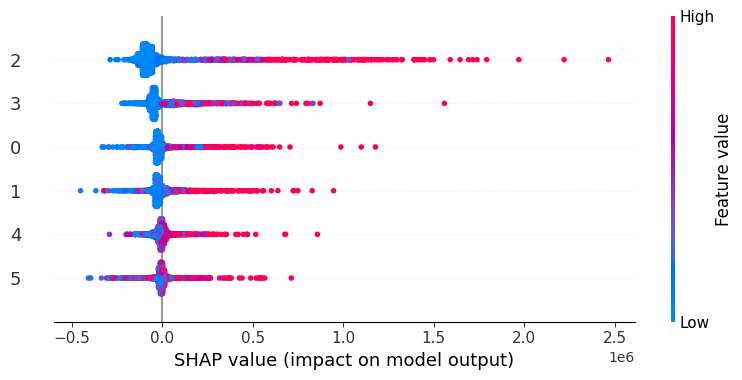

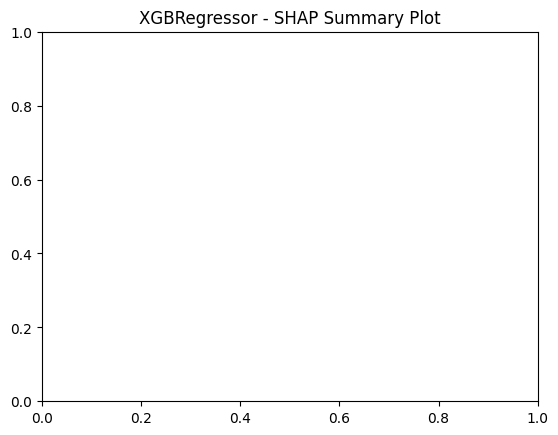

<Figure size 1000x600 with 0 Axes>

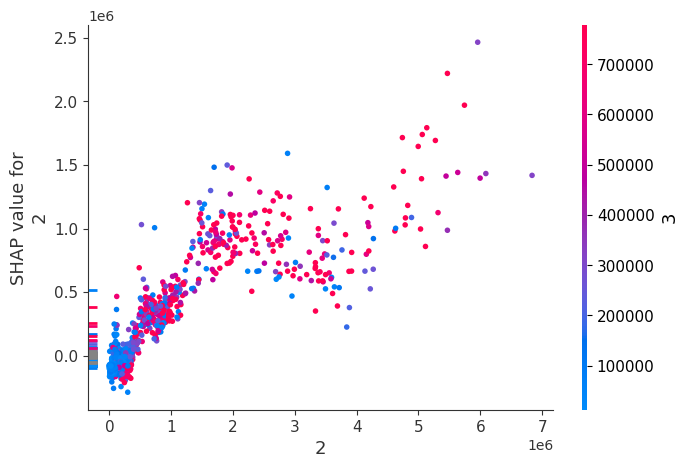

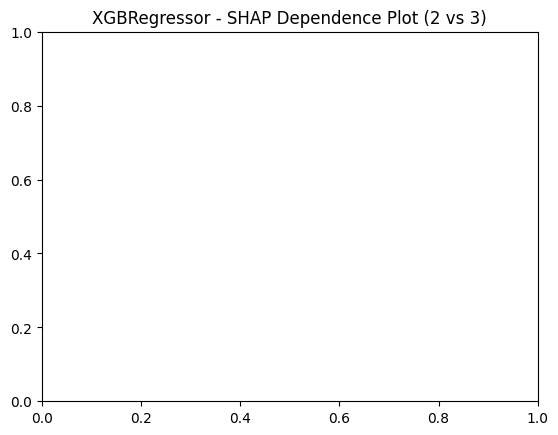

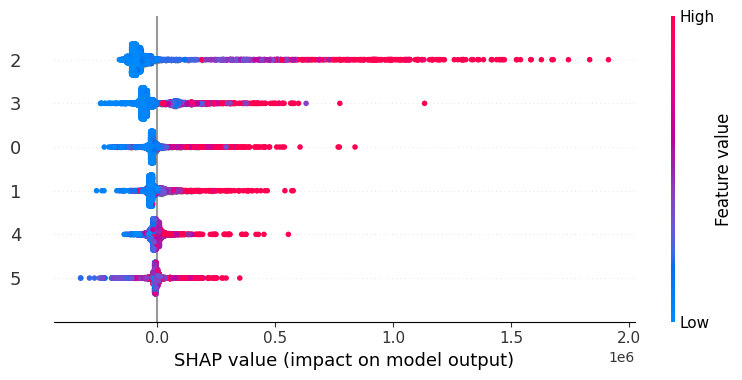

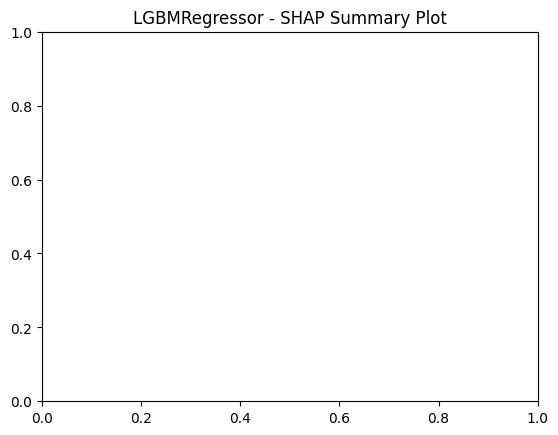

<Figure size 1000x600 with 0 Axes>

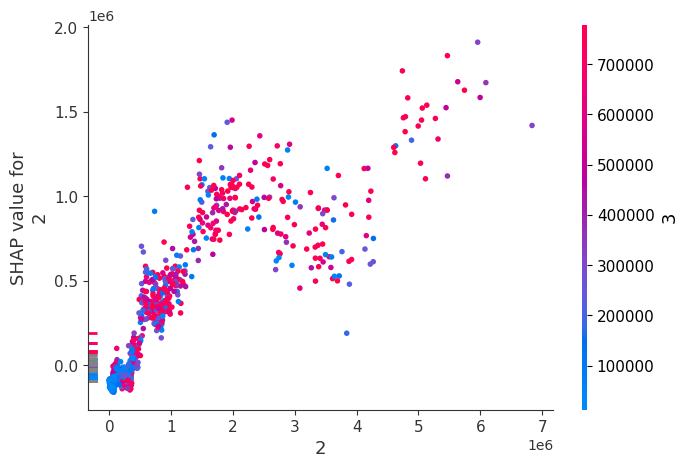

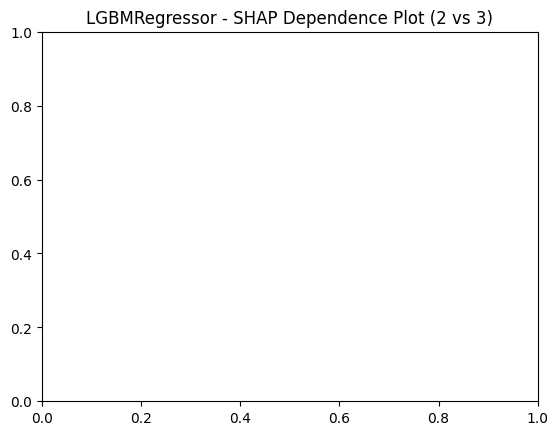

In [ ]:
# @title 特徴量選択対応
import xgboost as xgb
import lightgbm as lgb
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# サンプルデータ (あなたのデータに置き換えてください)
# 重要な変更点: train_v2 が ndarray の場合の対処
if isinstance(train_v2, np.ndarray):
    X = pd.DataFrame(train_v2) # ndarray を DataFrame に変換
else:
    X = train_v2
y = target

# 列名を設定（もし必要なら）
if not isinstance(X.columns, pd.Index):
  X.columns = [f'feature_{i}' for i in range(X.shape[1])]


# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# XGBoostモデルの学習
model_xgb = xgb.XGBRegressor(random_state=42)  # ハイパーパラメータは必要に応じて調整
model_xgb.fit(X_train, y_train)

# LightGBMモデルの学習
model_lgb = lgb.LGBMRegressor(random_state=42)  # ハイパーパラメータは必要に応じて調整
model_lgb.fit(X_train, y_train)


def visualize_shap(model, X_train, num_features):
    # SHAP値の計算
    explainer = shap.Explainer(model)
    shap_values = explainer(X_train)

    # 特徴量重要度のサマリープロット
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_train)
    plt.title(f"{type(model).__name__} - SHAP Summary Plot")
    plt.show()

    # 特徴量間の依存関係プロット (上位2つの特徴量)
    if num_features >= 2:
      top_features = np.abs(shap_values.values).mean(axis=0).argsort()[-2:][::-1]  #上位2つの特徴量のインデックス
      feature1 = X_train.columns[top_features[0]]
      feature2 = X_train.columns[top_features[1]]
      plt.figure(figsize=(10, 6))
      shap.dependence_plot(feature1, shap_values.values, X_train, display_features=X_train, interaction_index=feature2)
      plt.title(f"{type(model).__name__} - SHAP Dependence Plot ({feature1} vs {feature2})")
      plt.show()

# XGBoostによる特徴量選択と可視化
visualize_shap(model_xgb, X_train, num_features=3)

# LightGBMによる特徴量選択と可視化
visualize_shap(model_lgb, X_train, num_features=3)

In [ ]:
X.head()

0             1             2             3              4  \
0  64816.958901  36588.744606  37907.936721  45598.125851  224419.585457   
1  55507.543666  72387.334115  58225.196089  76376.547318  237021.486262   
2           NaN           NaN           NaN           NaN  142552.424055   
3  54811.222708  69339.923002  63647.340038  53799.011225  247798.633304   
4  81812.306362  53823.561587  77391.157768  17662.966241  180512.811869   

              5  
0  3.115016e+06  
1  6.625098e+05  
2  1.509645e+06  
3  2.486906e+06  
4  2.126404e+06

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [ ]:
test

array([[            nan,             nan,             nan, ...,
                    nan,  9.00000000e+00,  4.00000000e+00],
       [            nan,             nan,             nan, ...,
                    nan,  1.40000000e+01,  2.21000000e+02],
       [ 2.82750614e+04,  3.20751406e+04,  2.64457921e+04, ...,
        -1.15732233e-01,  8.00000000e+00,  1.30000000e+02],
       ...,
       [ 2.29561256e+04,  2.35924030e+04,  2.50694983e+04, ...,
        -2.03165439e-02,  8.00000000e+00,  1.32000000e+02],
       [ 1.24460895e+05,  1.40816449e+05,  9.31187052e+04, ...,
         3.99578593e-01,  8.00000000e+00,  9.80000000e+01],
       [            nan,             nan,             nan, ...,
                    nan,  9.00000000e+00,  3.00000000e+00]])

# ベースコードをリファクタリング(gemini)してモデル作成



In [ ]:
# @title signate提出用モデル作成ベース
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import gc

def train_model(model, X_train, y_train):
    """モデルをトレーニングする関数"""
    model.fit(X_train, np.log1p(y_train))
    return model

def predict_and_evaluate(model, X_valid, y_valid):
  """モデルで予測を行い、RMSLEを計算する関数"""
  y_pred = np.expm1(model.predict(X_valid))
  rmsle = mean_squared_log_error(y_valid, y_pred, squared=False)
  return y_pred, rmsle

def get_models_trained(train, test, target, num_folds):
    """複数のモデルをトレーニングし、アンサンブル予測を行う関数"""

    kf = KFold(n_splits=num_folds, shuffle=True, random_state=13)
    oof_predictions = np.zeros(len(train))
    test_predictions = np.zeros((len(test), 3)) # 各モデルの予測値を格納

    models = [
        XGBRegressor(n_estimators=626, max_depth=3, random_state=13, min_child_weight=0.001190123543553736, learning_rate=0.010519736270936835, subsample=0.7304788478701394, colsample_bylevel=0.604447278915981, colsample_bytree=0.7616852136157319, reg_alpha=0.115175569924065, reg_lambda=0.07155347824929895),
        XGBRegressor(n_estimators=206, max_depth=3, random_state=13, min_child_weight=0.002124665025111174, learning_rate=0.02528390491004826, subsample=0.800800019181945, colsample_bylevel=0.7264139639244361, colsample_bytree=0.7283285945816331, reg_alpha=0.13673920290025274, reg_lambda=0.008614256283329808),
        LGBMRegressor(n_estimators=56, random_state=13, verbose=-1)
    ]

    for fold, (train_index, valid_index) in enumerate(kf.split(train, target)):
        X_train, X_valid = train[train_index], train[valid_index]
        y_train, y_valid = target[train_index], target[valid_index]

        fold_predictions = np.zeros((len(X_valid),len(models)))

        for i, model in enumerate(models):
            model = train_model(model, X_train, y_train)
            y_pred, rmsle = predict_and_evaluate(model, X_valid, y_valid)
            print(f"Fold {fold+1}, Model {i+1} RMSLE: {rmsle}")
            fold_predictions[:,i] = y_pred
            test_predictions[:,i] += model.predict(test) / kf.n_splits


        oof_predictions[valid_index] = np.mean(fold_predictions, axis=1)
        gc.collect()
        print('---------------\n')

    # すべてのモデルの予測値を平均
    final_test_predictions = np.mean(test_predictions, axis=1)

    RMSLE = mean_squared_log_error(target, oof_predictions, squared=False)
    print(f"OOF RMSLE: {RMSLE}")
    return oof_predictions, np.expm1(final_test_predictions)

In [ ]:
oof_predictions,test_predictions = get_models_trained(train,test,target,30)
# OOF RMSLE: 0.7575154547817787

Fold 1, Model 1 RMSLE: 0.6749236639846902
Fold 1, Model 2 RMSLE: 0.675725109249275
Fold 1, Model 3 RMSLE: 0.685226641461286
---------------

Fold 2, Model 1 RMSLE: 0.741495466202525
Fold 2, Model 2 RMSLE: 0.7407269516841138
Fold 2, Model 3 RMSLE: 0.7581723637148129
---------------

Fold 3, Model 1 RMSLE: 0.6248107688556418
Fold 3, Model 2 RMSLE: 0.6178725458550647
Fold 3, Model 3 RMSLE: 0.6354542192580105
---------------

Fold 4, Model 1 RMSLE: 0.7189277759762976
Fold 4, Model 2 RMSLE: 0.7226785227980486
Fold 4, Model 3 RMSLE: 0.7157013727786403
---------------

Fold 5, Model 1 RMSLE: 0.8380334937498661
Fold 5, Model 2 RMSLE: 0.8379006768924674
Fold 5, Model 3 RMSLE: 0.8673778831504602
---------------

Fold 6, Model 1 RMSLE: 0.7914372290941633
Fold 6, Model 2 RMSLE: 0.7946708725978661
Fold 6, Model 3 RMSLE: 0.7994722623120212
---------------

Fold 7, Model 1 RMSLE: 0.7402634285010123
Fold 7, Model 2 RMSLE: 0.7409359759522659
Fold 7, Model 3 RMSLE: 0.7389094316588644
---------------

Fo

In [ ]:
submit  =  pd . read_csv ( 'sample_submission.csv' ,  header = None )
submit [ 1 ]  =  test_predictions
submit . to_csv ( 'submission_1205_1.csv' ,  header = None ,  index = False )

In [ ]:
# @title 特徴量選択後のモデル作成(ベース)
oof_predictions,test_predictions = get_models_trained(train_v2,test_v2,target,30)
# RMSLE: 0.7501119916248522

In [ ]:
submit  =  pd . read_csv ( 'sample_submission.csv' ,  header = None )
submit [ 1 ]  =  test_predictions
submit . to_csv ( 'submission_1129_1.csv' ,  header = None ,  index = False )

In [ ]:
!pip install imbalanced-learn

In [ ]:
# # @title データ拡張追加版
# import numpy as np
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_log_error
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# import gc

# def train_model(model, X_train, y_train):
#     """モデルをトレーニングする関数"""
#     # Clip target values to prevent invalid values
#     y_train_clipped = np.clip(y_train, a_min=1e-8, a_max=np.finfo(y_train.dtype).max)
#     model.fit(X_train, np.log1p(y_train_clipped))
#     return model

# def predict_and_evaluate(model, X_valid, y_valid):
#   """モデルで予測を行い、RMSLEを計算する関数"""
#   y_pred = np.expm1(model.predict(X_valid))
#   rmsle = mean_squared_log_error(y_valid, y_pred, squared=False)
#   return y_pred, rmsle

# def get_models_trained(train, test, target, num_folds):
#     """複数のモデルをトレーニングし、アンサンブル予測を行う関数"""

#     kf = KFold(n_splits=num_folds, shuffle=True, random_state=13)
#     oof_predictions = np.zeros(len(train))
#     test_predictions = np.zeros((len(test), 3)) # 各モデルの予測値を格納

#     models = [
#         XGBRegressor(n_estimators=626, max_depth=3, random_state=13, min_child_weight=0.001190123543553736, learning_rate=0.010519736270936835, subsample=0.7304788478701394, colsample_bylevel=0.604447278915981, colsample_bytree=0.7616852136157319, reg_alpha=0.115175569924065, reg_lambda=0.07155347824929895),
#         XGBRegressor(n_estimators=206, max_depth=3, random_state=13, min_child_weight=0.002124665025111174, learning_rate=0.02528390491004826, subsample=0.800800019181945, colsample_bylevel=0.7264139639244361, colsample_bytree=0.7283285945816331, reg_alpha=0.13673920290025274, reg_lambda=0.008614256283329808),
#         LGBMRegressor(n_estimators=56, random_state=13, verbose=-1)
#     ]

#     for fold, (train_index, valid_index) in enumerate(kf.split(train, target)):
#         X_train, X_valid = train[train_index], train[valid_index]
#         y_train, y_valid = target[train_index], target[valid_index]

#         # データの複製とノイズの追加
#         n_samples = len(X_train)
#         noise_std = np.std(y_train) * 0.1
#         n_duplicates = int(n_samples * 0.5)

#         # データの複製とノイズの追加
#         n_samples = len(X_train)
#         noise_std = np.std(y_train.ravel()) * 0.1  # ravel() を使用して標準偏差を計算
#         n_duplicates = int(n_samples * 0.5)

#         X_train_duplicated = np.concatenate([X_train] * (n_duplicates + 1), axis=0)
#         y_train_duplicated = np.concatenate([y_train.ravel()] * (n_duplicates + 1), axis=0) # ravel() を使用

#         noise = np.random.normal(0, noise_std, n_samples)
#         y_train_noisy = y_train.ravel() + noise # ravel() を使用

#         X_train_resampled = np.concatenate([X_train_duplicated, X_train], axis=0)
#         y_train_resampled = np.concatenate([y_train_duplicated, y_train_noisy], axis=0)


#         fold_predictions = np.zeros((len(X_valid),len(models)))

#         for i, model in enumerate(models):
#             model = train_model(model, X_train_resampled, y_train_resampled) # SMOTEで拡張したデータを使用
#             y_pred, rmsle = predict_and_evaluate(model, X_valid, y_valid)
#             print(f"Fold {fold+1}, Model {i+1} RMSLE: {rmsle}")
#             fold_predictions[:,i] = y_pred
#             test_predictions[:,i] += model.predict(test) / kf.n_splits


#         oof_predictions[valid_index] = np.mean(fold_predictions, axis=1)
#         gc.collect()
#         print('---------------\n')

#     # すべてのモデルの予測値を平均
#     final_test_predictions = np.mean(test_predictions, axis=1)

#     RMSLE = mean_squared_log_error(target, oof_predictions, squared=False)
#     print(f"OOF RMSLE: {RMSLE}")
#     return oof_predictions, np.expm1(final_test_predictions)

In [ ]:
# oof_predictions,test_predictions = get_models_trained(train,test,target,30)
# 処理が重すぎて結果が出せなかった。。

Fold 1, Model 1 RMSLE: 0.6811560820439959


KeyboardInterrupt: 

In [ ]:
print(y_train.shape)

(3724, 1)


In [ ]:
# @title signate提出用（モデル追加版）
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import gc

def train_model(model, X_train, y_train):
    """モデルをトレーニングする関数"""
    model.fit(X_train, np.log1p(y_train))
    return model

def predict_and_evaluate(model, X_valid, y_valid):
  """モデルで予測を行い、RMSLEを計算する関数"""
  y_pred = np.expm1(model.predict(X_valid))
  rmsle = mean_squared_log_error(y_valid, y_pred, squared=False)
  return y_pred, rmsle

def get_models_trained(train, test, target, num_folds):
    """複数のモデルをトレーニングし、アンサンブル予測を行う関数"""

    kf = KFold(n_splits=num_folds, shuffle=True, random_state=13)
    oof_predictions = np.zeros(len(train))
    test_predictions = np.zeros((len(test), 4))  # 各モデルの予測値を格納 (モデル数が4つになったため変更)

    models = [
        XGBRegressor(n_estimators=626, max_depth=3, random_state=13, min_child_weight=0.001190123543553736, learning_rate=0.010519736270936835, subsample=0.7304788478701394, colsample_bylevel=0.604447278915981, colsample_bytree=0.7616852136157319, reg_alpha=0.115175569924065, reg_lambda=0.07155347824929895),
        XGBRegressor(n_estimators=206, max_depth=3, random_state=13, min_child_weight=0.002124665025111174, learning_rate=0.02528390491004826, subsample=0.800800019181945, colsample_bylevel=0.7264139639244361, colsample_bytree=0.7283285945816331, reg_alpha=0.13673920290025274, reg_lambda=0.008614256283329808),
        # LGBMRegressor(n_estimators=327, max_depth=7, learning_rate=0.12741920430017042, num_leaves=52, min_child_samples=21, subsample=0.7130010142766848, colsample_bytree=0.8733488672577971, reg_alpha=2.2119815091261996, reg_lambda=8.228991747822569, random_state=13, verbose=-1),
        # LGBMRegressor(n_estimators=56, random_state=13, verbose=-1),
        CatBoostRegressor(iterations=311, depth=4, learning_rate=0.015325536572303757, loss_function='RMSE', random_seed=13, verbose=0),
        CatBoostRegressor(iterations=423, depth=2, learning_rate=0.014949903792354727, loss_function='RMSE', random_seed=13, verbose=0)
    ]


    for fold, (train_index, valid_index) in enumerate(kf.split(train, target)):
        X_train, X_valid = train[train_index], train[valid_index]
        y_train, y_valid = target[train_index], target[valid_index]

        fold_predictions = np.zeros((len(X_valid), len(models)))

        for i, model in enumerate(models):
            model = train_model(model, X_train, y_train)
            y_pred, rmsle = predict_and_evaluate(model, X_valid, y_valid)
            print(f"Fold {fold + 1}, Model {i + 1} RMSLE: {rmsle}")
            fold_predictions[:, i] = y_pred
            test_predictions[:, i] += model.predict(test) / kf.n_splits

        oof_predictions[valid_index] = np.mean(fold_predictions, axis=1)
        gc.collect()
        print('---------------\n')

    final_test_predictions = np.mean(test_predictions, axis=1)
    RMSLE = mean_squared_log_error(target, oof_predictions, squared=False)
    print(f"OOF RMSLE: {RMSLE}")
    return oof_predictions, np.expm1(final_test_predictions)

In [ ]:
oof_predictions,test_predictions = get_models_trained(train,test,target,10)
# RMSLE: 0.7590907095955967

In [ ]:
submit  =  pd . read_csv ( 'sample_submission.csv' ,  header = None )
submit [ 1 ]  =  test_predictions
submit . to_csv ( 'submission_1127_4.csv' ,  header = None ,  index = False )

In [ ]:
# @title 特徴量選択後のモデル作成(ベース)
oof_predictions,test_predictions = get_models_trained(train_v2,test_v2,target,30)
# RMSLE: 0.7543860885955033

In [ ]:
# @title アンサンブルモデル変更版
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import HuberRegressor
import gc

def train_model(model, X_train, y_train):
    """モデルをトレーニングする関数"""
    model.fit(X_train, np.log1p(y_train))
    return model

def predict_and_evaluate(model, X_valid, y_valid):
  """モデルで予測を行い、RMSLEを計算する関数"""
  y_pred = np.expm1(model.predict(X_valid))
  rmsle = mean_squared_log_error(y_valid, y_pred, squared=False)
  return y_pred, rmsle

def get_models_trained(train, test, target, num_folds):
    """複数のモデルをトレーニングし、アンサンブル予測を行う関数"""

    kf = KFold(n_splits=num_folds, shuffle=True, random_state=13)
    oof_predictions = np.zeros(len(train))
    test_predictions = np.zeros((len(test), 3))  # 各モデルの予測値を格納 (モデル数が4つになったため変更)

    models = [
        XGBRegressor(n_estimators=626, max_depth=3, random_state=13, min_child_weight=0.001190123543553736, learning_rate=0.010519736270936835, subsample=0.7304788478701394, colsample_bylevel=0.604447278915981, colsample_bytree=0.7616852136157319, reg_alpha=0.115175569924065, reg_lambda=0.07155347824929895),
        CatBoostRegressor(iterations=311, depth=4, learning_rate=0.015325536572303757, loss_function='RMSE', random_seed=13, verbose=0),
        # HuberRegressor(), # nanの値を処理できないので利用する場合は、nanを平均値に置き換えるなどの対応が必要そう
        RandomForestRegressor(random_state=13)
    ]


    for fold, (train_index, valid_index) in enumerate(kf.split(train, target)):
        X_train, X_valid = train[train_index], train[valid_index]
        y_train, y_valid = target[train_index], target[valid_index]

        fold_predictions = np.zeros((len(X_valid), len(models)))

        for i, model in enumerate(models):
            model = train_model(model, X_train, y_train)
            y_pred, rmsle = predict_and_evaluate(model, X_valid, y_valid)
            print(f"Fold {fold + 1}, Model {i + 1} RMSLE: {rmsle}")
            fold_predictions[:, i] = y_pred
            test_predictions[:, i] += model.predict(test) / kf.n_splits

        oof_predictions[valid_index] = np.mean(fold_predictions, axis=1)
        gc.collect()
        print('---------------\n')

    final_test_predictions = np.mean(test_predictions, axis=1)
    RMSLE = mean_squared_log_error(target, oof_predictions, squared=False)
    print(f"OOF RMSLE: {RMSLE}")
    return oof_predictions, np.expm1(final_test_predictions)

In [ ]:
# @title 特徴量選択後のモデル作成(ベース)
oof_predictions,test_predictions = get_models_trained(train,test,target,10)
# RMSLE: 0.7592066716955153

In [ ]:
submit  =  pd . read_csv ( 'sample_submission.csv' ,  header = None )
submit [ 1 ]  =  test_predictions
submit . to_csv ( 'submission_1129_2.csv' ,  header = None ,  index = False )

In [ ]:
# @title NATICSコードを活用した予測
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import gc
import pandas as pd

def train_model(model, X_train, y_train):
    """モデルをトレーニングする関数"""
    model.fit(X_train, np.log1p(y_train))
    return model

def predict_and_evaluate(model, X_valid, y_valid):
  """モデルで予測を行い、RMSLEを計算する関数"""
  y_pred = np.expm1(model.predict(X_valid))
  rmsle = mean_squared_log_error(y_valid, y_pred, squared=False)
  return y_pred, rmsle

def get_models_trained(train, test, target, naics_col_name, num_folds):
    """複数のモデルをトレーニングし、アンサンブル予測を行う関数"""

    kf = KFold(n_splits=num_folds, shuffle=True, random_state=13)
    oof_predictions = np.zeros(len(train))
    test_predictions = np.zeros((len(test), 3)) # 各モデルの予測値を格納
    rmsle_by_naics = {}

    models = [
        XGBRegressor(n_estimators=626, max_depth=3, random_state=13, min_child_weight=0.001190123543553736, learning_rate=0.010519736270936835, subsample=0.7304788478701394, colsample_bylevel=0.604447278915981, colsample_bytree=0.7616852136157319, reg_alpha=0.115175569924065, reg_lambda=0.07155347824929895),
        XGBRegressor(n_estimators=206, max_depth=3, random_state=13, min_child_weight=0.002124665025111174, learning_rate=0.02528390491004826, subsample=0.800800019181945, colsample_bylevel=0.7264139639244361, colsample_bytree=0.7283285945816331, reg_alpha=0.13673920290025274, reg_lambda=0.008614256283329808),
        LGBMRegressor(n_estimators=56, random_state=13, verbose=-1)
    ]

    for fold, (train_index, valid_index) in enumerate(kf.split(train, target)):
        X_train, X_valid = train.iloc[train_index], train.iloc[valid_index] # Use .iloc for row-based indexing
        y_train, y_valid = target[train_index], target[valid_index]

        # Access NAICS codes using the column name
        naics_train, naics_valid = train.loc[train_index, naics_col_name], train.loc[valid_index, naics_col_name]

        # Initialize fold_predictions here with the correct shape
        fold_predictions = np.zeros((len(valid_index), len(models)))

        for i, model in enumerate(models):
            model = train_model(model, X_train, y_train)
            y_pred, rmsle = predict_and_evaluate(model, X_valid, y_valid)
            print(f"Fold {fold+1}, Model {i+1} RMSLE: {rmsle}")
            fold_predictions[:,i] = y_pred  # Now fold_predictions is defined
            test_predictions[:,i] += model.predict(test) / kf.n_splits

        oof_predictions[valid_index] = np.mean(fold_predictions, axis=1)

        # NAICSコード毎のRMSLE計算
        for naics in np.unique(naics_codes):
            valid_indices_naics = np.where(naics_valid == naics)[0]
            if len(valid_indices_naics) > 0:
                rmsle_naics = mean_squared_log_error(y_valid[valid_indices_naics], np.mean(fold_predictions[valid_indices_naics,:], axis=1), squared=False)
                rmsle_by_naics[naics] = rmsle_by_naics.get(naics, []) + [rmsle_naics]

        gc.collect()
        print('---------------\n')

    # すべてのモデルの予測値を平均
    final_test_predictions = np.mean(test_predictions, axis=1)

    # 全体のRMSLE
    RMSLE = mean_squared_log_error(target, oof_predictions, squared=False)
    print(f"OOF RMSLE: {RMSLE}")

    # NAICSコード毎の平均RMSLE
    avg_rmsle_by_naics = {naics: np.mean(rmsles) for naics, rmsles in rmsle_by_naics.items()}
    print("Average RMSLE by NAICS code:")
    print(avg_rmsle_by_naics)

    # 平均RMSLE
    average_rmsle = np.mean(list(avg_rmsle_by_naics.values()))
    print(f"Average RMSLE across all NAICS codes: {average_rmsle}")

    return oof_predictions, np.expm1(final_test_predictions)

In [ ]:
target = pd.Series(target.ravel())
oof_predictions, test_predictions = get_models_trained(train_df, test_df, target, 'PrimaryNAICS', num_folds=5)

In [ ]:
submit  =  pd . read_csv ( 'sample_submission.csv' ,  header = None )
submit [ 1 ]  =  test_predictions
submit . to_csv ( 'submission_1129_2.csv' ,  header = None ,  index = False )

# パラメータチューニング

In [ ]:
# @title optunaのインストール
# !pip install optuna

In [ ]:
# @title RMSEの最適化(catboost)
# ライブラリをインポート
# import optuna
# import numpy as np
# from sklearn.model_selection import train_test_split
# from catboost import CatBoostRegressor
# from sklearn.metrics import mean_squared_error, mean_squared_log_error

# # X(説明変数)とy(目的変数)は事前に準備しとく
# train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

# def objective(trial):
#     params = {
#         "iterations": trial.suggest_int("iterations", 50, 500),
#         "depth": trial.suggest_int("depth", 2, 10),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
#         "loss_function": "RMSE",
#         "random_seed": 42,  # 乱数のシードを固定
#         "verbose": 0  # トレーニング中の出力メッセージを非表示
#     }

#     model = CatBoostRegressor(**params)
#     model.fit(train_X, train_y, eval_set=(val_X, val_y))
#     y_pred = model.predict(val_X)

#     rmse = np.sqrt(mean_squared_error(val_y, y_pred)) # RMSE
#     return rmse


# study = optuna.create_study(direction="minimize")
# study.optimize(objective, n_trials=100)  # n_trials を増やすとより精度の高いチューニングが可能になります

# print("Number of finished trials:", len(study.trials))
# print("Best trial:", study.best_trial.params)
# print("Best value:", study.best_value)

In [ ]:
# @title catboost(RMSLE)
# import optuna
# import numpy as np
# from sklearn.model_selection import train_test_split
# from catboost import CatBoostRegressor
# from sklearn.metrics import mean_squared_log_error

# # データを準備します。train_X, train_y, val_X, val_y は事前に準備しておいてください。
# # 例:
# train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

# def objective(trial):
#     params = {
#         "iterations": trial.suggest_int("iterations", 50, 500),
#         "depth": trial.suggest_int("depth", 2, 10),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
#         "loss_function": "RMSE", # RMSEのまま
#         "random_seed": 42,
#         "verbose": 0
#     }

#     model = CatBoostRegressor(**params)
#     model.fit(train_X, train_y, eval_set=(val_X, val_y))
#     y_pred = model.predict(val_X)

#     # Clip predictions to a reasonable range to avoid overflow in expm1
#     y_pred = np.clip(y_pred, 1e-6, 700) # Limit to 700 to avoid overflow

#     # Clip val_y to a reasonable range to avoid overflow in expm1
#     val_y_clipped = np.clip(val_y, 1e-6, 700)  # Limit to 700 to avoid overflow

#     # Calculate RMSLE with clipped values
#     rmsle = np.sqrt(mean_squared_log_error(np.expm1(val_y_clipped), np.expm1(y_pred)))

#     return rmsle


# study = optuna.create_study(direction="minimize")
# study.optimize(objective, n_trials=100)

# print("Number of finished trials:", len(study.trials))
# print("Best trial:", study.best_trial.params)
# print("Best value:", study.best_value)

# best_params = study.best_trial.params

In [ ]:
# @title RMSEの最適化(lgbm)
# import optuna
# import numpy as np
# from sklearn.model_selection import train_test_split
# from lightgbm import LGBMRegressor, early_stopping
# from sklearn.metrics import mean_squared_error

# # データを準備します。train_X, train_y, val_X, val_y は事前に準備しておいてください。
# train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

# def objective(trial):
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
#         "max_depth": trial.suggest_int("max_depth", 3, 15),
#         "num_leaves": trial.suggest_int("num_leaves", 31, 100),
#         "min_child_samples": trial.suggest_int("min_child_samples", 10, 50),
#         "subsample": trial.suggest_float("subsample", 0.5, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
#         "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 10.0),
#         "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 10.0),
#         "random_state": 42, # 乱数のシードを固定
#         "verbose": -1 # トレーニング中の出力メッセージを非表示  Remove verbose from here
#     }

#     model = LGBMRegressor(**params)
#     model.fit(train_X, train_y, eval_set=[(val_X, val_y)],
#               callbacks=[early_stopping(stopping_rounds=50, verbose=False)])
#     y_pred = model.predict(val_X)

#     rmse = np.sqrt(mean_squared_error(val_y, y_pred)) # RMSE
#     return rmse

# study = optuna.create_study(direction="minimize")
# study.optimize(objective, n_trials=100) # n_trials を増やすとより精度の高いチューニングが可能になります

# print("Number of finished trials:", len(study.trials))
# print("Best trial:", study.best_trial.params)
# print("Best value:", study.best_value)

In [ ]:
# @title RMSLEの最適化(lgbm)
# import optuna
# import numpy as np
# from sklearn.model_selection import train_test_split
# from lightgbm import LGBMRegressor, early_stopping # Import early_stopping
# from sklearn.metrics import mean_squared_log_error

# # データを準備します。train_X, train_y, val_X, val_y は事前に準備しておいてください。
# # 例:
# train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

# def objective(trial):
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
#         "max_depth": trial.suggest_int("max_depth", 3, 15),
#         "num_leaves": trial.suggest_int("num_leaves", 31, 100),
#         "min_child_samples": trial.suggest_int("min_child_samples", 10, 50),
#         "subsample": trial.suggest_float("subsample", 0.5, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
#         "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 10.0),
#         "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 10.0),
#         "random_state": 42, # 乱数のシードを固定
#         "verbose": -1 # トレーニング中の出力メッセージを非表示
#     }

#     model = LGBMRegressor(**params)
#     # Pass early_stopping as a callback to the fit method
#     model.fit(train_X, train_y, eval_set=[(val_X, val_y)],
#               callbacks=[early_stopping(stopping_rounds=50, verbose=False)])
#     y_pred = model.predict(val_X)

#     # Clip predictions to avoid overflow in expm1
#     y_pred = np.clip(y_pred, 1e-6, None)  # Lower bound to avoid log(0) error
#     val_y_clipped = np.clip(val_y, 1e-6, None) # Lower bound to avoid log(0) error

#     rmsle = np.sqrt(mean_squared_log_error(val_y_clipped, y_pred)) # RMSLEを計算
#     return rmsle


# study = optuna.create_study(direction="minimize")
# study.optimize(objective, n_trials=100)

# print("Number of finished trials:", len(study.trials))
# print("Best trial:", study.best_trial.params)
# print("Best value:", study.best_value)

# pycaretで最適モデル探索

In [ ]:
# @title pycaretのインストール
# !pip install pycaret[full] # 必要な時のみインストールする

# インストール後にcolabの再起動が必要

In [ ]:
# @title pycaretで最適なモデルを探索(RMSLEだと、Huber Regressor(0.8112) > Random Forest Regressor(0.8686) > catboost0.8703)の順)
# import pandas as pd
# import numpy as np
# from pycaret.regression import *
# from sklearn.model_selection import train_test_split

# # Convert target NumPy array to pandas Series
# target_series = pd.Series(target.ravel(), name='target')  # ravel to flatten if needed

# # Convert 'train' to a pandas DataFrame if it's not already
# train = pd.DataFrame(train)  # Assuming 'train' is your NumPy array

# # Concatenate X_train and target_series
# data = pd.concat([train, target_series], axis=1)

# # Drop rows with missing values in the 'target' column
# data.dropna(subset=['target'], inplace=True)

# # Reset index if needed after dropping rows
# data.reset_index(drop=True, inplace=True)

# # PyCaret's setup (using the cleaned data)
# reg = setup(data=data,
#             target='target',
#             train_size=0.8,
#             session_id=42
#             )

# # モデルの比較
# best_model = compare_models()

# # 最良モデルの評価
# evaluate_model(best_model)

# # 最良モデルの予測 using the correctly preprocessed data
# predictions = predict_model(best_model, data=X_test_pycaret)
# print(predictions)


In [ ]:
data.info()

In [ ]:
X.info()

In [ ]:
y